# `Project 115 - Group[3] - Telecom Churn Prediction`

In [1]:
#Importing Primary Pakckages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#Reading the dataset
df = pd.read_csv('telecommunications_churn.csv', sep = ';')
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

###  ...................................................... Exploratory Data Analsis (EDA) ......................................................



In [28]:
#Dimensions of the data
df.shape

(3333, 19)

In [29]:
# Checking Data Types
df.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [30]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [31]:
# Mathematical Modelling Information
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [32]:
#Checkng for null vales
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

<AxesSubplot:>

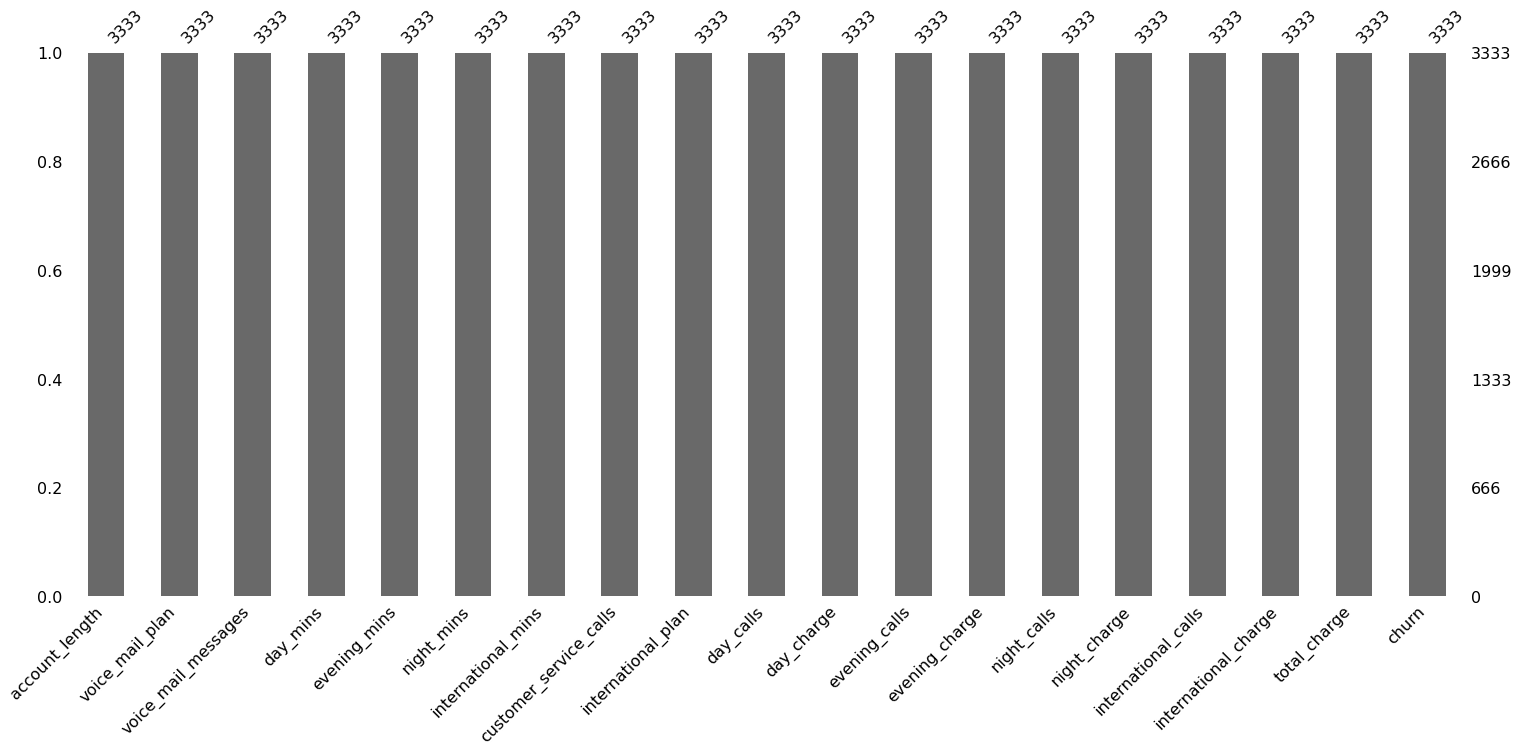

In [36]:
!pip install missingno
import missingno as msno
msno.bar(df)

In [33]:
# Checking correlation between different columns
df.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


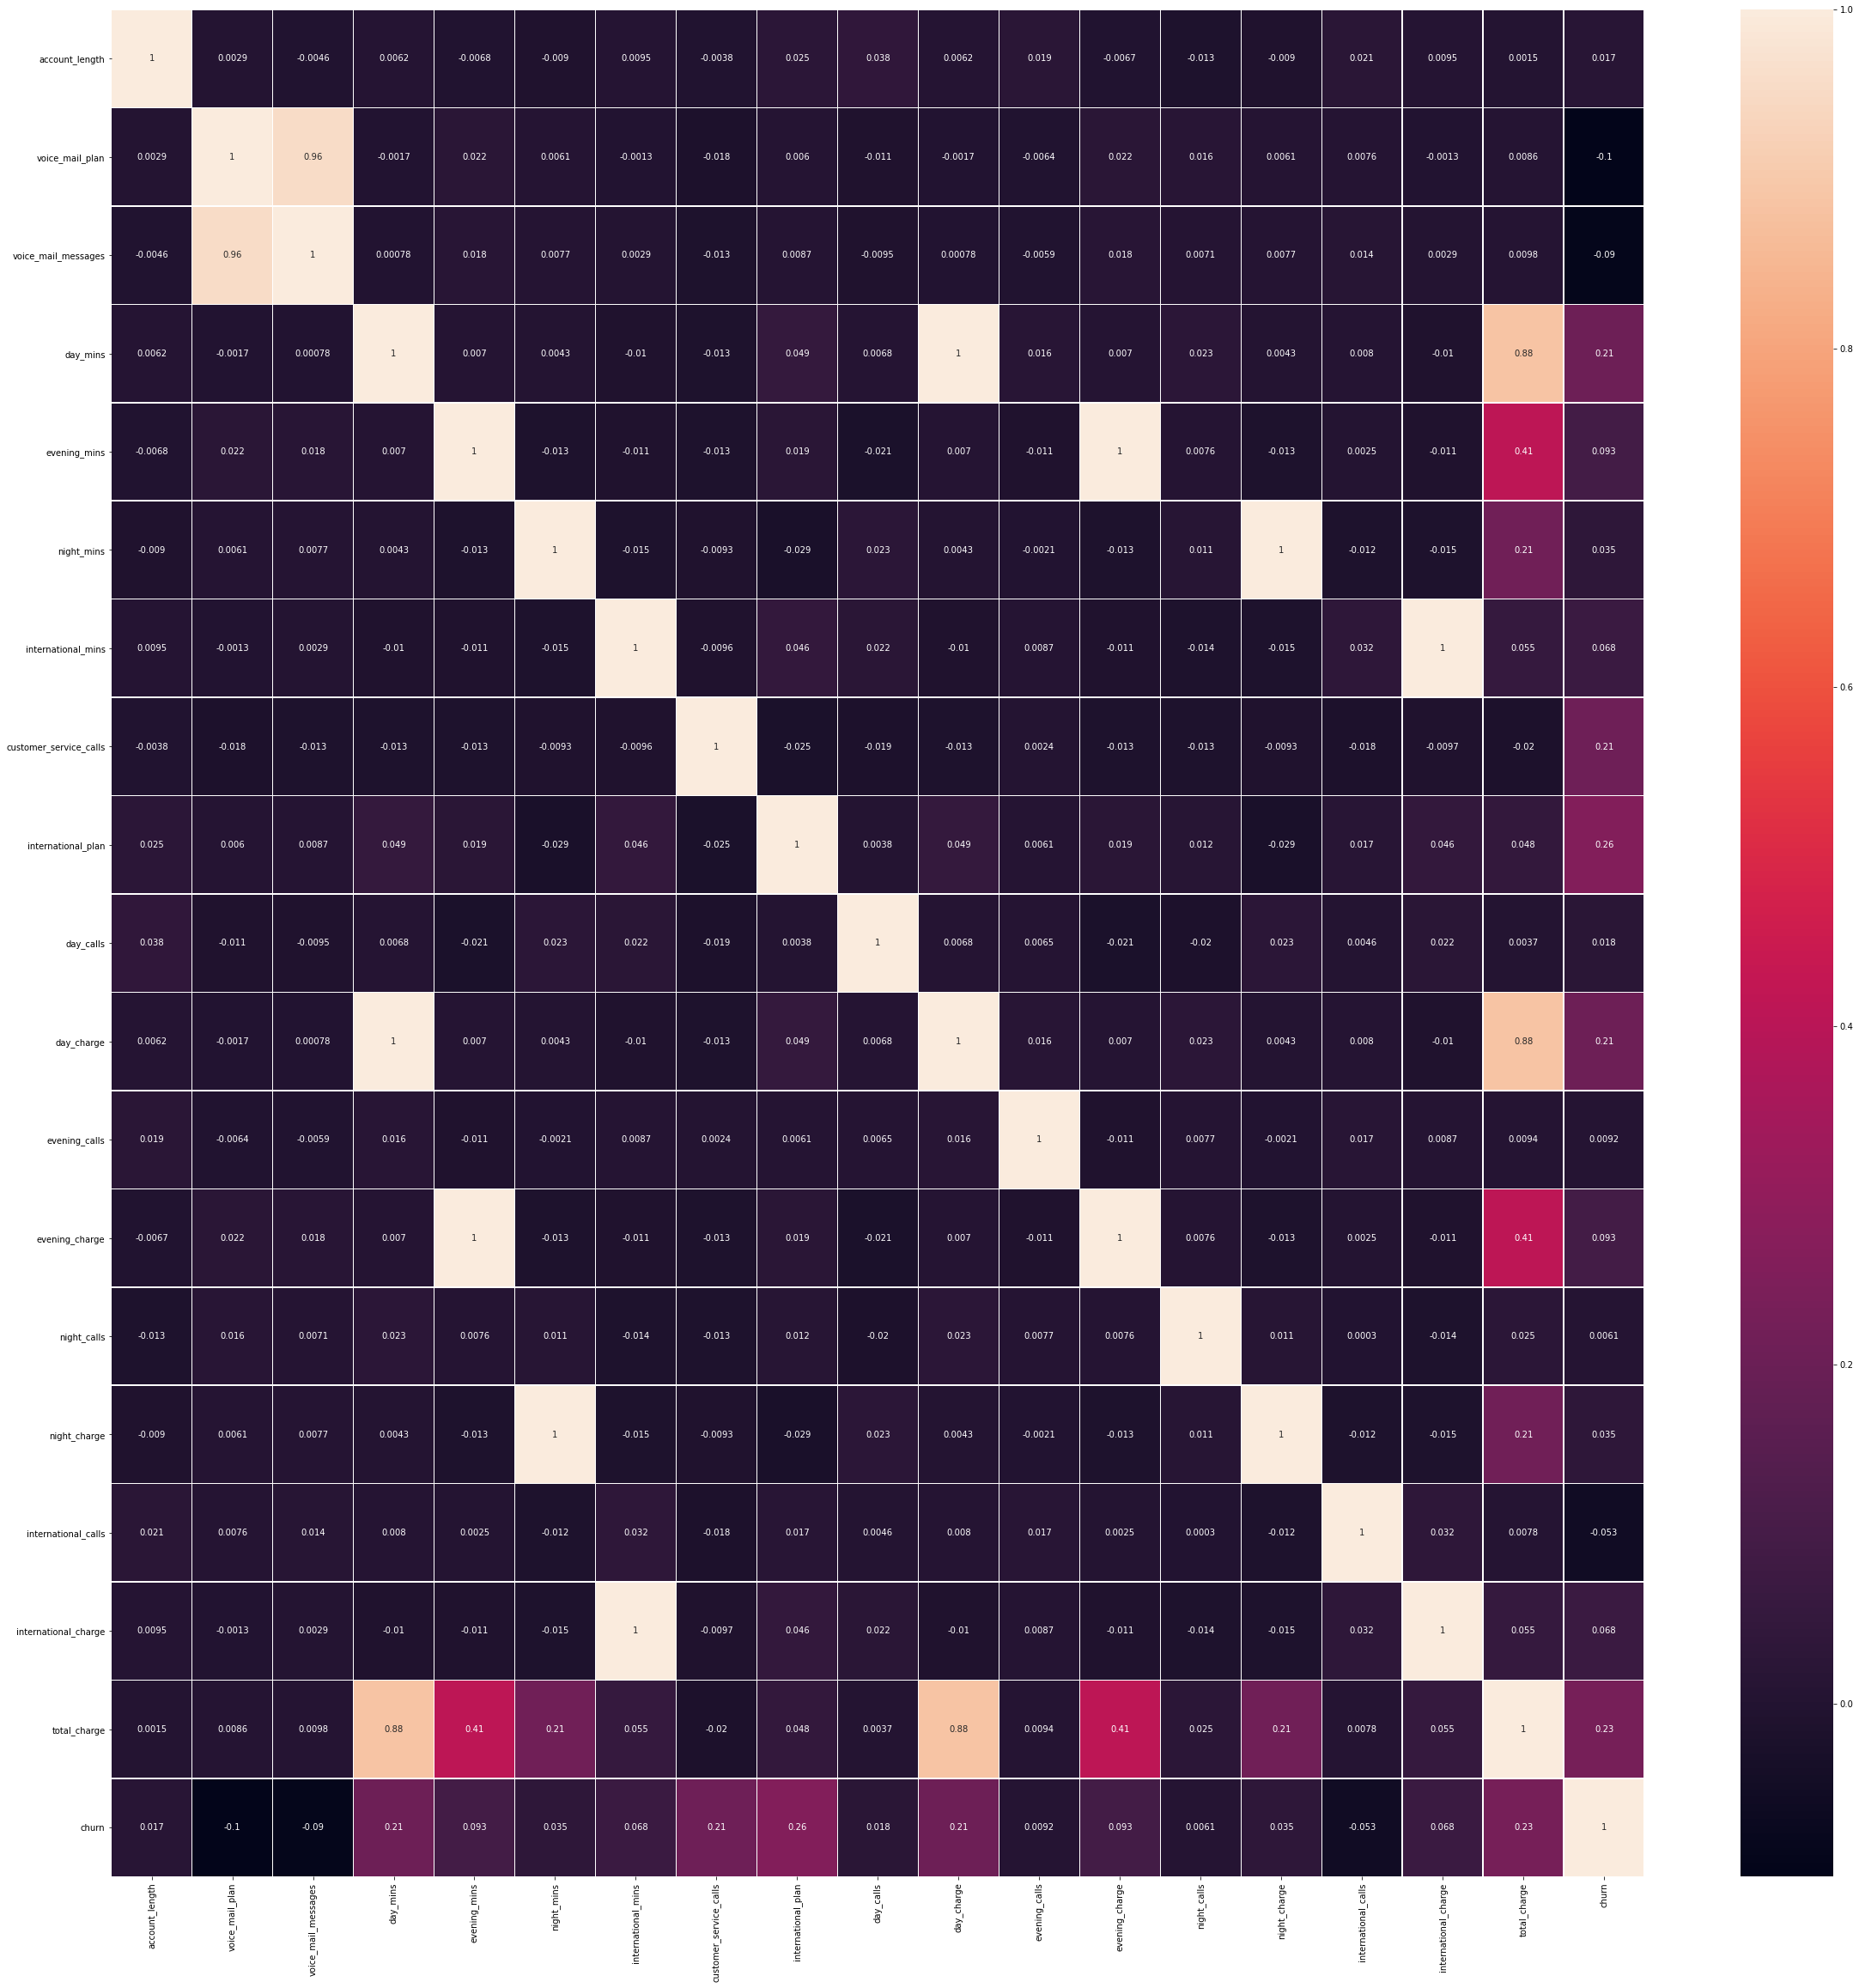

In [34]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax);

In [37]:
#Checking for duplicate values
df.drop_duplicates()
df.shape

(3333, 19)

In [38]:
# ____________________________________________ Target Column Analysis __________________________________________________ #

#Unique values
df["churn"].unique()

array([0, 1], dtype=int64)

In [39]:
# Count of classes
df["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: int64

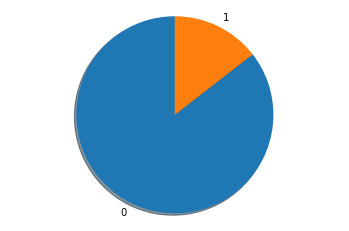

In [40]:
plt.pie(df["churn"].value_counts(),shadow=True, startangle=90,labels=df["churn"].unique())
plt.axis('equal') ;

<AxesSubplot:xlabel='churn', ylabel='count'>

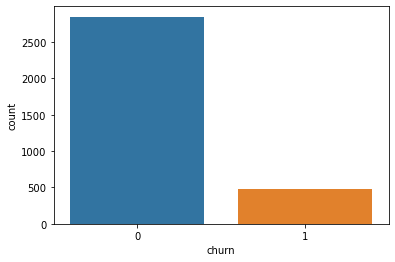

In [43]:
sns.countplot(x = 'churn', data = df)

### ....................................... Data Visualization .......................................

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
17      1
20      1
19      1
Name: international_calls, dtype: int64


<AxesSubplot:xlabel='international_calls', ylabel='count'>

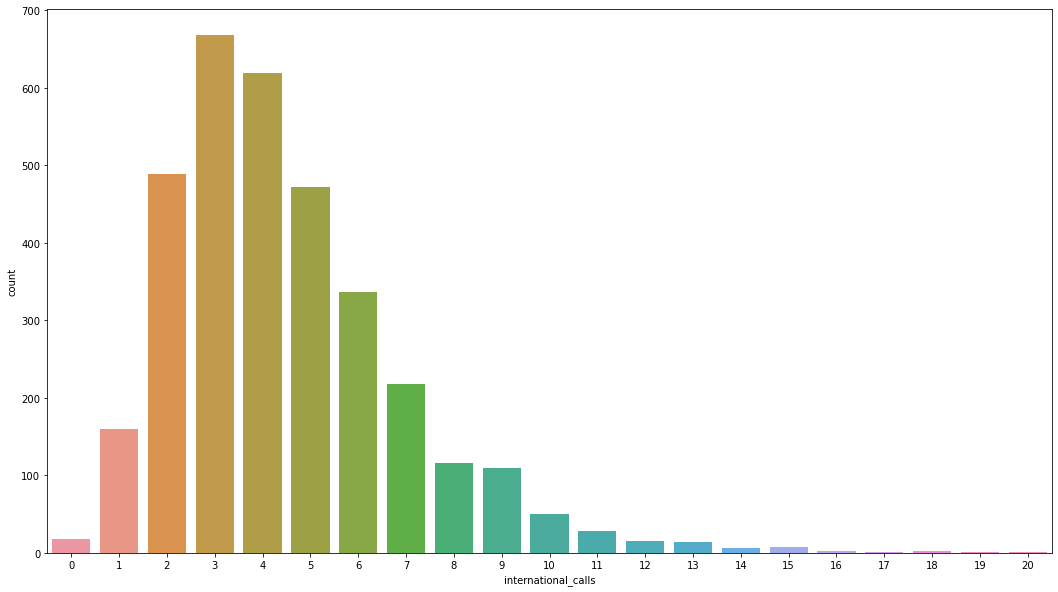

In [47]:
print(df["international_calls"].value_counts())
plt.figure(figsize= (18, 10))
sns.countplot(x = 'international_calls', data = df)

<AxesSubplot:xlabel='churn', ylabel='total_charge'>

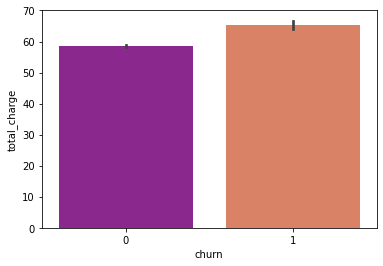

In [49]:
# Relation between 'churn' & 'total_charge' columns
sns.barplot(x ='churn', y ='total_charge', data = df, 
            palette ='plasma')

<AxesSubplot:xlabel='churn', ylabel='total_charge'>

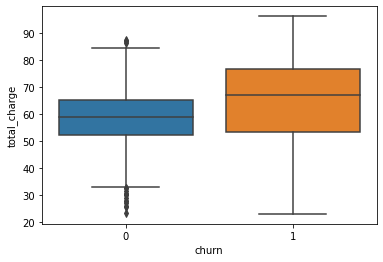

In [50]:
sns.boxplot(x='churn', y='total_charge', data=df)

<AxesSubplot:>

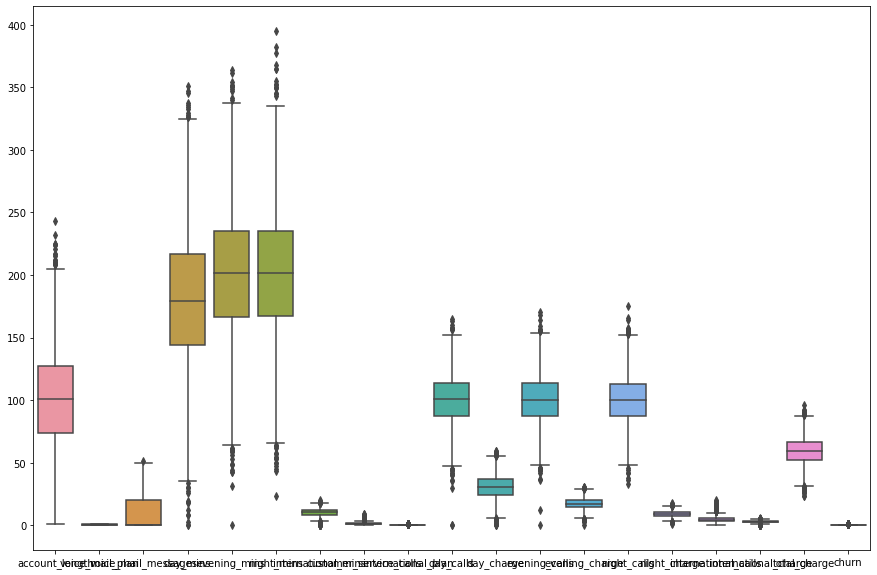

In [3]:
# Boxplot visualization
plt.figure(figsize= (15,10))
sns.boxplot(data = df)

<AxesSubplot:xlabel='total_charge', ylabel='Count'>

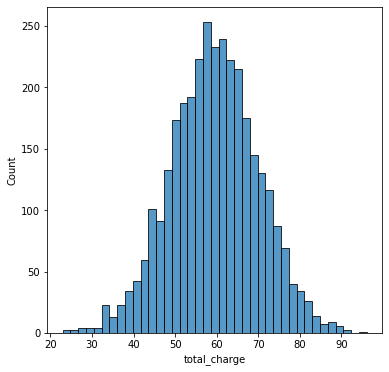

In [53]:
#Checking distribution
plt.figure(figsize= (6, 6))
sns.histplot(data=df, x="total_charge")

<AxesSubplot:xlabel='account_length', ylabel='Count'>

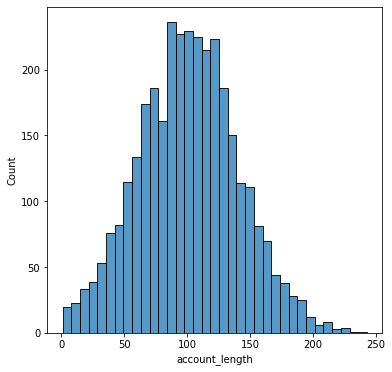

In [70]:
plt.figure(figsize= (6, 6))
sns.histplot(data=df, x="account_length")

In [56]:
col = ['day_charge', 'evening_charge', 'night_charge', 'international_charge', 'total_charge']
df1 = df[col]
df1

,day_charge,evening_charge,night_charge,international_charge,total_charge
0,45.07,16.78,11.01,2.70,75.56
1,27.47,16.62,11.45,3.70,59.24
2,41.38,10.30,7.32,3.29,62.29
3,50.90,5.26,8.86,1.78,66.80
4,28.34,12.61,8.41,2.73,52.09
...,...,...,...,...,...
3328,26.55,18.32,12.56,2.67,60.10
3329,39.29,13.04,8.61,2.59,63.53
3330,30.74,24.55,8.64,3.81,67.74
3331,36.35,13.57,6.26,1.35,57.53


<Figure size 720x720 with 0 Axes>

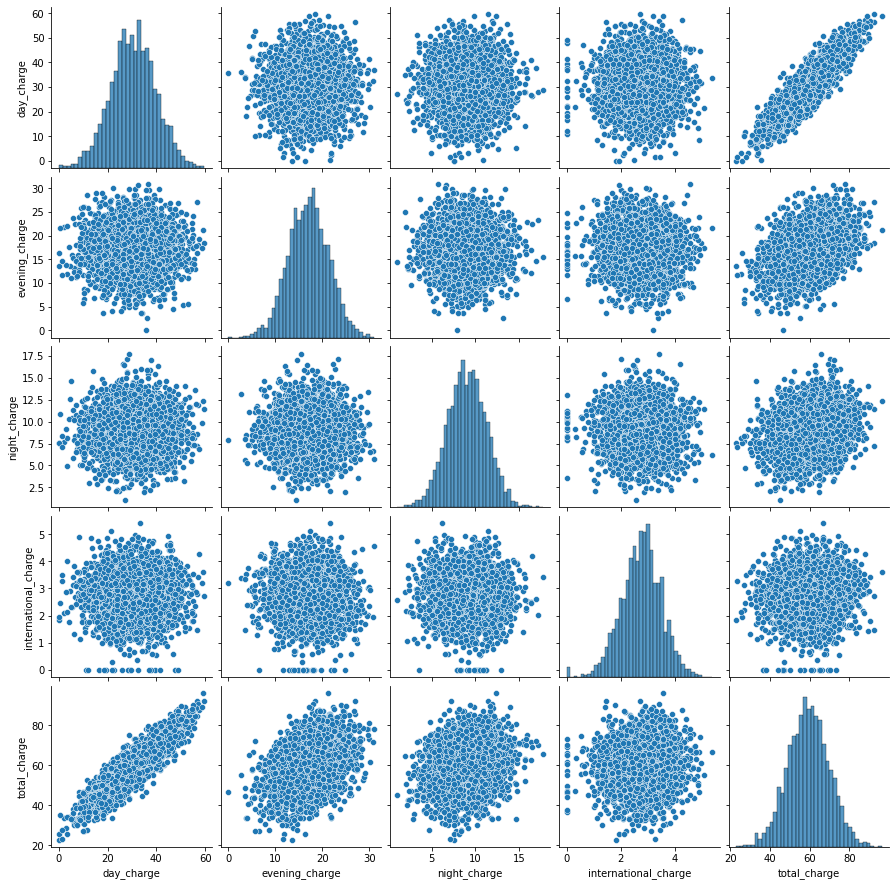

In [57]:
plt.figure(figsize= (10, 10))
sns.pairplot(df1)

<BarContainer object of 3333 artists>

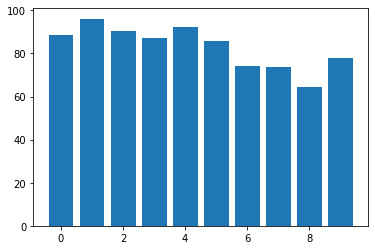

In [60]:
plt.bar(df.customer_service_calls,df.total_charge)

0.9999927417510324


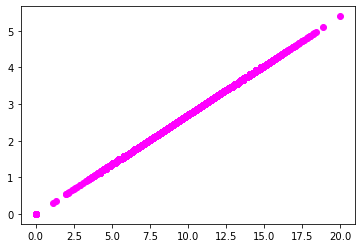

In [62]:
C# correlation between minutes & charge
print(df.international_mins.corr(df.international_charge))
plt.scatter(df.international_mins,df.international_charge,c="magenta")

0.9999999521903995


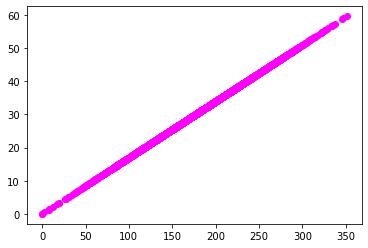

In [63]:
print(df.day_mins.corr(df.day_charge))
plt.scatter(df.day_mins,df.day_charge,c="magenta")

0.9999997760198502


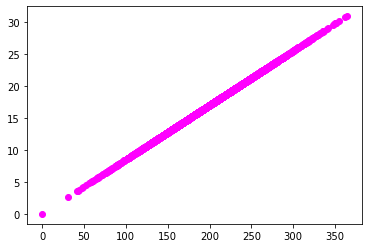

In [64]:
print(df.evening_mins.corr(df.evening_charge))
plt.scatter(df.evening_mins,df.evening_charge,c="magenta")

0.9999992148758772


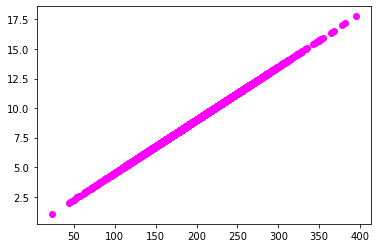

In [65]:
print(df.night_mins.corr(df.night_charge))
plt.scatter(df.night_mins,df.night_charge,c="magenta")

## .................................................... KEY INSIGHTS ....................................................

_____

`1] Data is imbalanced where Major Class = 'Not churn' (i.e. class 0) & Minor Class = 'Churn' (i.e. class 1)`

`2] Total Charge =  Day Charge + Evening Chrage + Night Charge + International Charge`

`3] Minutes & Charge have almost perfect positive correlation between them`

`4] Dataset is not having any null values as well as duplicate values but outliers are present which need to be treated`

## ..................................... Outlier Treatment .....................................

In [3]:
# Considering only 1 column : 'account_legth'
# finding Inter Quartile Range
Q1 = df['account_length'].quantile(0.25)
Q3 = df['account_length'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

53.0


In [4]:
# Detection & treatment of outliers

outliers = df[(df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))]

low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR

df['account_length'] = np.where(df['account_length'] < low_limit, low_limit, np.where(df['account_length'] > up_limit, 
                                                                                      up_limit, df['account_length']))

<AxesSubplot:xlabel='account_length'>

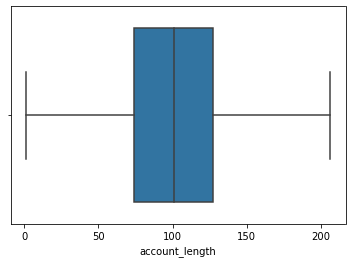

In [5]:
# Checking for outliers
sns.boxplot(x = 'account_length', data= df)

<AxesSubplot:>

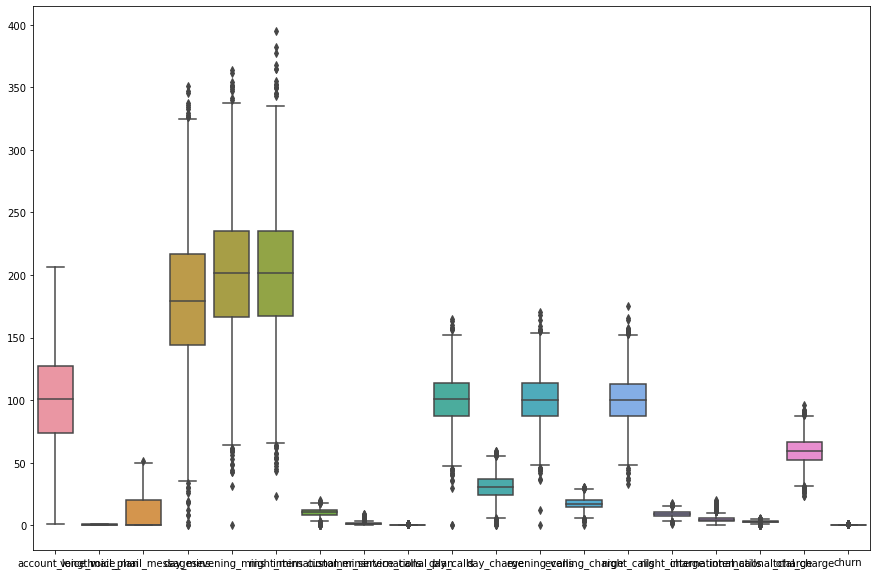

In [6]:
# Considering Entire Dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [7]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [8]:
# Considering colums whose outliers need to be treated
req_col = ['day_mins', 'evening_mins', 'night_mins', 'international_mins', 'day_calls', 'day_charge', 'evening_calls', 
           'evening_charge', 'night_calls', 'night_charge', 'total_charge']

In [9]:
def impute_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    df = np.where(df > upper, upper, np.where(df < lower, lower, df))
    return df       

In [10]:
# Apply function on selected columns
df[req_col] = impute_outlier(df[req_col])
df.head(10)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1,25,265.1,197.40,244.7,10.0,1,0,110.0,45.07,99.0,16.78,91.0,11.01,3,2.70,75.56,0
1,107.0,1,26,161.6,195.50,254.4,13.7,1,0,123.0,27.47,103.0,16.62,103.0,11.45,3,3.70,59.24,0
2,137.0,0,0,243.4,121.20,162.6,12.2,0,0,114.0,41.38,110.0,10.30,104.0,7.32,5,3.29,62.29,0
3,84.0,0,0,299.4,63.55,196.9,6.6,2,1,71.0,50.90,88.0,5.40,89.0,8.86,7,1.78,66.80,0
4,75.0,0,0,166.7,148.30,186.9,10.1,3,1,113.0,28.34,122.0,12.61,121.0,8.41,3,2.73,52.09,0
5,118.0,0,0,223.4,220.60,203.9,6.3,0,1,98.0,37.98,101.0,18.75,118.0,9.18,6,1.70,67.61,0
6,121.0,1,24,218.2,338.35,212.6,7.5,3,0,88.0,37.09,108.0,28.76,118.0,9.57,7,2.03,78.31,0
7,147.0,0,0,157.0,103.10,211.8,7.1,0,1,79.0,26.69,94.0,8.76,96.0,9.53,6,1.92,46.90,0
8,117.0,0,0,184.5,338.35,215.8,8.7,1,0,97.0,31.37,80.0,28.76,90.0,9.71,4,2.35,73.32,0
9,141.0,1,37,258.6,222.00,326.4,11.2,0,1,84.0,43.96,111.0,18.87,97.0,14.69,5,3.02,80.54,0


In [11]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.003300,0.276628,8.099010,179.816157,201.009541,200.828143,10.254575,1.562856,0.096910,100.473597,30.569292,100.134113,17.086016,100.098410,9.037381,4.479448,2.764581,59.455509,0.144914
std,39.644112,0.447398,13.688365,54.152190,50.401365,50.118622,2.721007,1.315491,0.295879,19.863740,9.205865,19.758567,4.284135,19.443717,2.255212,2.461214,0.753773,10.431164,0.352067
min,1.000000,0.000000,0.000000,34.650000,63.550000,64.550000,3.100000,0.000000,0.000000,46.500000,5.890000,46.500000,5.400000,48.000000,2.915000,0.000000,0.000000,31.230000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,206.500000,1.000000,51.000000,325.450000,338.350000,337.750000,17.500000,9.000000,1.000000,154.500000,55.330000,154.500000,28.760000,152.000000,15.195000,20.000000,5.400000,87.630000,1.000000


<AxesSubplot:>

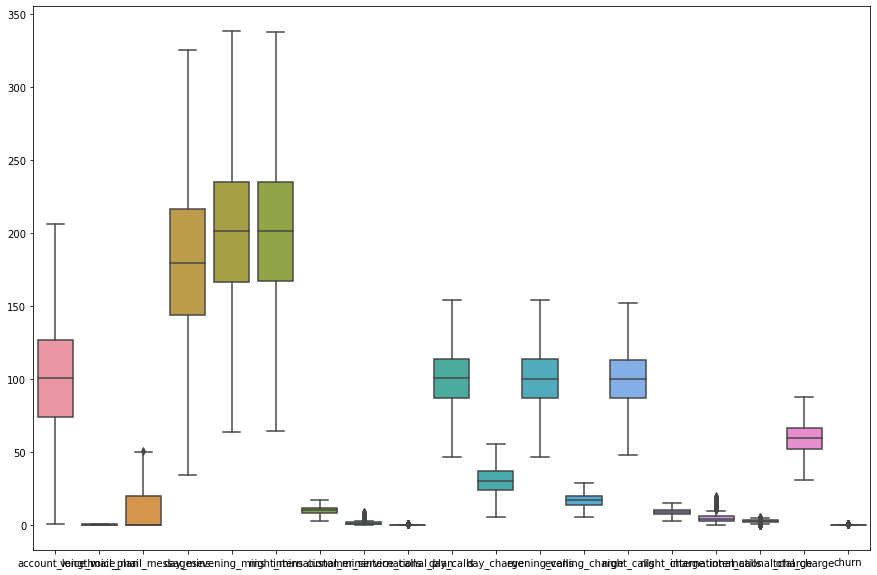

In [12]:
plt.figure(figsize= (15,10))
sns.boxplot(data = df)

##  Model Building : Imbalanced Original Data

# .................................................................................................................


In [3]:
# Defining feature & target variables
x = df.iloc[:, :18]
y = df['churn']

In [4]:
# Model Building Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix

**`Model [1] : Logistic Regression`**

In [128]:
# Divide into Train & Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=10)

lr = LogisticRegression()
lr.fit(x_train, y_train)
#Train
y_pred_lr_t = lr.predict(x_train)
acc_LR_t = accuracy_score(y_pred_lr_t, y_train)
print("Training Accuracy :", acc_LR_t * 100)
#Test
y_pred_lr = lr.predict(x_test)
acc_LR = accuracy_score(y_pred_lr, y_test)
print("Testing Accuarcy :", acc_LR * 100)
print('\n')
print(classification_report(y_pred_lr, y_test))
print('\n')
print(confusion_matrix(y_test, y_pred_lr))


Training Accuracy : 84.44063437633947
Testing Accuarcy : 86.3


              precision    recall  f1-score   support

           0       0.99      0.87      0.93       986
           1       0.05      0.50      0.09        14

    accuracy                           0.86      1000
   macro avg       0.52      0.68      0.51      1000
weighted avg       0.98      0.86      0.91      1000



[[856   7]
 [130   7]]


**`Model [2] : Naive Bayes`**

In [129]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
#Train
y_pred_nb_t = nb.predict(x_train)
acc_NB_t = accuracy_score(y_pred_nb_t, y_train)
print("Training Accuracy :", acc_NB_t * 100)
#Test
y_pred_nb = nb.predict(x_test)
acc_NB = accuracy_score(y_pred_nb, y_test)
print("Testing Accuarcy :",acc_NB * 100)
print('\n')
print(classification_report(y_pred_nb, y_test))
print('\n')
print(confusion_matrix(y_test, y_pred_nb))

Training Accuracy : 63.65195027861124
Testing Accuarcy : 62.6


              precision    recall  f1-score   support

           0       0.64      0.90      0.75       613
           1       0.55      0.19      0.29       387

    accuracy                           0.63      1000
   macro avg       0.59      0.55      0.52      1000
weighted avg       0.60      0.63      0.57      1000



[[551 312]
 [ 62  75]]


**`Model [3] : Decision Tree`**

In [130]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(x_train,y_train) 
#Train
y_pred_dt_t = dt.predict(x_train)
acc_DT_t = accuracy_score(y_pred_dt_t, y_train)
print("Training Accuracy :", acc_DT_t * 100)
#Test
y_pred_dt = dt.predict(x_test)
acc_DT = accuracy_score(y_pred_dt, y_test)
print("Testing Accuarcy :",acc_DT * 100)
print("\n")
print(classification_report(y_test, y_pred_dt))
print("\n")
print(confusion_matrix(y_test, y_pred_dt))

Training Accuracy : 95.11358765537933
Testing Accuarcy : 94.89999999999999


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       863
           1       0.99      0.64      0.77       137

    accuracy                           0.95      1000
   macro avg       0.97      0.82      0.87      1000
weighted avg       0.95      0.95      0.94      1000



[[862   1]
 [ 50  87]]


**`Model [4] : Random Forest Classifier`**

In [131]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
#Train
y_pred_rf_t = rf.predict(x_train)
acc_RF_t = accuracy_score(y_pred_rf_t, y_train)
print("Training Accuracy :", acc_RF_t * 100)
#Test
y_pred_rf = rf.predict(x_test)
acc_RF = accuracy_score(y_pred_rf, y_test)
print("Testing Accuarcy :",acc_RF * 100)
print("\n")
print(classification_report(y_test, y_pred_rf))
print("\n")
print(confusion_matrix(y_test, y_pred_rf))

Training Accuracy : 100.0
Testing Accuarcy : 97.89999999999999


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       863
           1       1.00      0.85      0.92       137

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



[[863   0]
 [ 21 116]]


**` Model [5] : Support Vector Classifier`**

In [132]:
sv = SVC()
sv.fit(x_train, y_train)
#Train
y_pred_sv_t = sv.predict(x_train)
acc_SVC_t = accuracy_score(y_pred_sv_t, y_train)
print("Training Accuracy :", acc_SVC_t * 100)
#Test
y_pred_sv = sv.predict(x_test)
acc_SVC = accuracy_score(y_pred_sv, y_test)
print("Testing Accuarcy :",acc_SVC * 100)
print("\n")
print(classification_report(y_test, y_pred_sv))
print("\n")
print(confusion_matrix(y_test, y_pred_sv))

Training Accuracy : 85.29789969995714
Testing Accuarcy : 86.4


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       863
           1       1.00      0.01      0.01       137

    accuracy                           0.86      1000
   macro avg       0.93      0.50      0.47      1000
weighted avg       0.88      0.86      0.80      1000



[[863   0]
 [136   1]]


**`Model [6] : Gradient Boosting`**

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gc.fit(x_train,y_train)
#Train
y_pred_gc_t = gc.predict(x_train)
acc_GB_t = accuracy_score(y_pred_gc_t, y_train)
print("Training Accuracy :", acc_GB_t * 100)
#Test
y_pred_gc = gc.predict(x_test)
acc_GB = accuracy_score(y_pred_gc, y_test)
print("Testing Accuarcy :",acc_GB * 100)
print("\n")
print(classification_report(y_test, y_pred_gc))
print("\n")
print(confusion_matrix(y_test, y_pred_gc))

Training Accuracy : 95.24217745392198
Testing Accuarcy : 93.2


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       863
           1       0.82      0.65      0.72       137

    accuracy                           0.93      1000
   macro avg       0.88      0.81      0.84      1000
weighted avg       0.93      0.93      0.93      1000



[[843  20]
 [ 48  89]]


**`Model [7] : Ada Boost Classifier`**

In [134]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ab.fit(x_train,y_train) 
#Train
y_pred_ab_t = ab.predict(x_train)
acc_AB_t = accuracy_score(y_pred_ab_t, y_train)
print("Training Accuracy :", acc_AB_t * 100)
#Test
y_pred_ab = ab.predict(x_test)
acc_AB = accuracy_score(y_pred_ab, y_test)
print("Testing Accuarcy :",acc_AB * 100)
print("\n")
print(classification_report(y_test, y_pred_ab))
print("\n")
print(confusion_matrix(y_test, y_pred_ab))

Training Accuracy : 93.31333047578225
Testing Accuarcy : 90.9


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       863
           1       0.76      0.49      0.60       137

    accuracy                           0.91      1000
   macro avg       0.84      0.73      0.77      1000
weighted avg       0.90      0.91      0.90      1000



[[842  21]
 [ 70  67]]


**`Model [8] : Neural Netwroks`**

In [40]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler 
Std = StandardScaler()
x_std = Std.fit_transform(x)
x_std

array([[ 0.67648946,  1.6170861 ,  1.23488274, ..., -0.60119509,
        -0.0856905 ,  1.53420904],
       [ 0.14906505,  1.6170861 ,  1.30794844, ..., -0.60119509,
         1.2411686 , -0.01997527],
       [ 0.9025285 , -0.61839626, -0.59175986, ...,  0.21153386,
         0.69715637,  0.27048197],
       ...,
       [-1.83505538, -0.61839626, -0.59175986, ...,  0.61789834,
         1.3871231 ,  0.78949572],
       [ 2.08295458, -0.61839626, -0.59175986, ...,  2.24335625,
        -1.87695028, -0.18282178],
       [-0.67974475,  1.6170861 ,  1.23488274, ..., -0.19483061,
         1.2411686 ,  1.67229526]])

In [45]:
# Importing necessary packages for Hypertuning
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2

In [46]:
# Hypertuning of Batchsize & Epochs

# create model
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=18 ,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [47]:
# Building the model

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(x_std, y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.903 total time=   5.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.925 total time=   6.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.885 total time=   5.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.899 total time=   6.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.905 total time=   5.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [50]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9303928971290588, using {'batch_size': 40, 'epochs': 50}
0.9033897519111633,0.012992024373017183 with: {'batch_size': 10, 'epochs': 10}
0.9261846542358398,0.012029089015662933 with: {'batch_size': 10, 'epochs': 50}
0.9282912492752076,0.006267723049292874 with: {'batch_size': 10, 'epochs': 100}
0.9045891523361206,0.010429756304952338 with: {'batch_size': 20, 'epochs': 10}
0.9270877957344055,0.009738966242455844 with: {'batch_size': 20, 'epochs': 50}
0.9276928901672363,0.00290503604023104 with: {'batch_size': 20, 'epochs': 100}
0.8898897409439087,0.02030168010939872 with: {'batch_size': 40, 'epochs': 10}
0.9303928971290588,0.0037493987963897065 with: {'batch_size': 40, 'epochs': 50}
0.9294942498207093,0.0045292868769729044 with: {'batch_size': 40, 'epochs': 100}


In [51]:
# Hypertuning of Activation Function & Kernal Initializer

from keras.layers import Dropout

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 18,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 18,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 50,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_std, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.861 total time=   2.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.888 total time=   2.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.845 total time=   2.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.838 total time=   2.6s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.850 total time=   2.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.856 total time=   2.6s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.853 total time=   2.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.867 total time=   2.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.883 total time=   3.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.847 total time=   2.3s
[CV 4/5; 11/12] START activation_f

In [52]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.8667823672294617, using {'activation_function': 'relu', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8568765044212341,0.017115993613432114 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8667823672294617,0.01400023021724124 with: {'activation_function': 'relu', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'relu', 'init': 'zero'}
0.8640828251838684,0.01498462617948116 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8646829843521118,0.016049569813429063 with: {'activation_function': 'tanh', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8613819241523742,0.012434041142232698 with: {'a

In [53]:
# Hypertuning of number of neurons in Activation Layer

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 18,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_std,y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.861 total time=   2.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.888 total time=   2.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.844 total time=   2.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.845 total time=   3.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.838 total time=   2.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [54]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8778934836387634, using {'neuron1': 8, 'neuron2': 8}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 4, 'neuron2': 2}
0.8595760583877563,0.024872614431079604 with: {'neuron1': 4, 'neuron2': 4}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 4, 'neuron2': 8}
0.8580758929252624,0.019710143154111286 with: {'neuron1': 8, 'neuron2': 2}
0.8652786254882813,0.024364690347850312 with: {'neuron1': 8, 'neuron2': 4}
0.8778934836387634,0.019466409305440212 with: {'neuron1': 8, 'neuron2': 8}
0.862584912776947,0.01997278484893121 with: {'neuron1': 16, 'neuron2': 2}
0.8667742609977722,0.02688023185217115 with: {'neuron1': 16, 'neuron2': 4}
0.8598790645599366,0.017964271640577373 with: {'neuron1': 16, 'neuron2': 8}


In [55]:
# Training the model with optimum values

from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 18,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 18,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    # adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40, epochs = 100)

# Fitting the model

model.fit(x_std,y)

# Predicting using trained model

y_predict = model.predict(x_std)

# Printing the metrics
acc_ANN = accuracy_score(y,y_predict)
print(acc_ANN * 100)

93.99939993999399


### Compairing the accuracies : Imbalanced Original Data 

In [135]:
# Compairing Accuracies - Imbalanced Origial Data
Imbalanced_Original =  {'Model' : ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
                                   'Support Vector Clssifier', 'Gradient Boost', 'AdaBoost', 'Neural Network'],
                       'Training Accuracy' : [acc_LR_t, acc_NB_t, acc_DT_t, acc_RF_t, acc_SVC_t, acc_GB_t, acc_AB_t, "NA"], 
                        'Testing Accuracy' : [acc_LR, acc_NB, acc_DT, acc_RF, acc_SVC, acc_GB, acc_AB, acc_ANN]}


result1 = pd.DataFrame(Imbalanced_Original)
result1 = result1.sort_values(by = 'Testing Accuracy', ascending= False, ignore_index= True)
result1

,Model,Training Accuracy,Testing Accuracy
0,Random Forest,1.0,0.979000
1,Decision Tree,0.951136,0.949000
2,Neural Network,NA,0.939994
3,Gradient Boost,0.952422,0.932000
4,AdaBoost,0.933133,0.909000
5,Support Vector Clssifier,0.852979,0.864000
6,Logistic Regression,0.844406,0.863000
7,Naive Bayes,0.63652,0.626000


<AxesSubplot:xlabel='Model', ylabel='Testing Accuracy'>

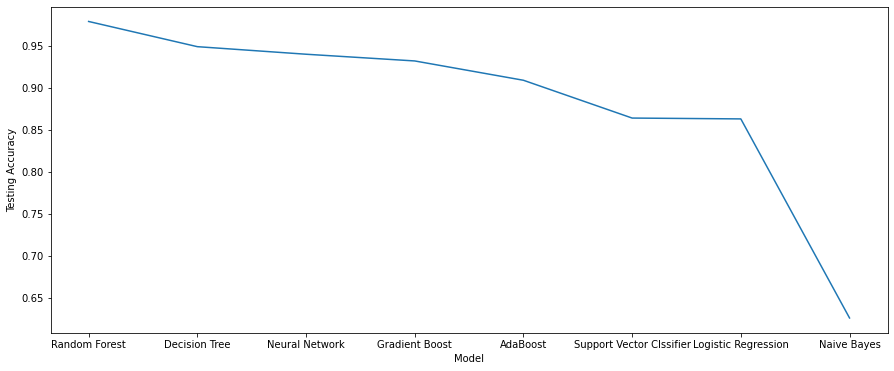

In [62]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'Model', y= 'Testing Accuracy', data= result1)

## ................................................ BALANCING THE DATA ............................................................

In [68]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

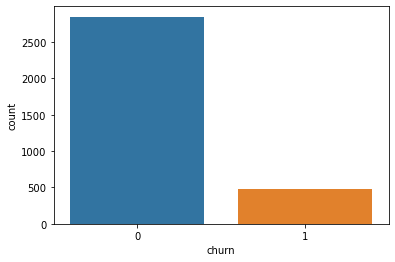

In [69]:
sns.countplot(x = 'churn', data = df)

In [70]:
# Oversampling Minor Class
from imblearn.over_sampling import SMOTE

In [71]:
x = df.iloc[:, :18]
y = df['churn']

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTE(sampling_strategy = 'minority', random_state= 0)
x_res,y_res = smk.fit_resample(x, y)
df_bal = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)], axis=1)
df_bal.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


0    2850
1    2850
Name: churn, dtype: int64




<AxesSubplot:xlabel='churn', ylabel='count'>

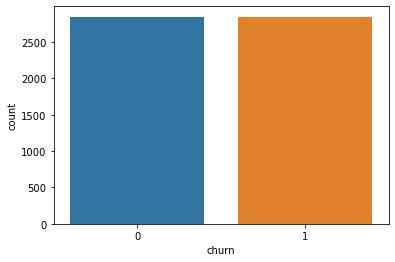

In [72]:
print(df_bal['churn'].value_counts())

print('\n')
sns.countplot(x = 'churn', data = df_bal)

## Model Building : Balanced Original Data

# .................................................................................................................

In [73]:
# Feature & Target Variables
X = df_bal.iloc[:, :18]
Y = df_bal['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=10)

**`Model [1] : Logistic Regresion`**

In [119]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
#Train
Y_pred_lr_t = lr.predict(X_train)
acc_LR_t1 = accuracy_score(Y_pred_lr_t, Y_train)
print("Training Accuracy :", acc_LR_t * 100)
#Test
Y_pred_lr = lr.predict(X_test)
acc_bal_LR = accuracy_score(Y_pred_lr, Y_test)
print("Testing Accuarcy :", acc_bal_LR * 100)
print('\n')
print(classification_report(Y_pred_lr, Y_test))
print('\n')
print(confusion_matrix(Y_test, Y_pred_lr))


Training Accuracy : 84.44063437633947
Testing Accuarcy : 69.35672514619883


              precision    recall  f1-score   support

           0       0.67      0.70      0.69       814
           1       0.72      0.68      0.70       896

    accuracy                           0.69      1710
   macro avg       0.69      0.69      0.69      1710
weighted avg       0.69      0.69      0.69      1710



[[573 283]
 [241 613]]


**`Model [2] : Naive Bayes`**

In [120]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
#Train
Y_pred_nb_t = nb.predict(X_train)
acc_NB_t1 = accuracy_score(Y_pred_nb_t, Y_train)
print("Training Accuracy :", acc_NB_t * 100)
#Test
Y_pred_nb = nb.predict(X_test)
acc_bal_NB = accuracy_score(Y_pred_nb, Y_test)
print("Testing Accuarcy :",acc_bal_NB * 100)
print('\n')
print(classification_report(Y_pred_nb, Y_test))
print('\n')
print(confusion_matrix(Y_test, Y_pred_nb))

Training Accuracy : 57.719298245614034
Testing Accuarcy : 58.77192982456141


              precision    recall  f1-score   support

           0       0.55      0.60      0.57       783
           1       0.63      0.58      0.60       927

    accuracy                           0.59      1710
   macro avg       0.59      0.59      0.59      1710
weighted avg       0.59      0.59      0.59      1710



[[467 389]
 [316 538]]


**`Model [3] : Decision Tree`**

In [121]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,Y_train) 
#Train
Y_pred_dt_t = dt.predict(X_train)
acc_DT_t1 = accuracy_score(Y_pred_dt_t, Y_train)
print("Training Accuracy :", acc_DT_t * 100)
#Test
Y_pred_dt = dt.predict(X_test)
acc_bal_DT = accuracy_score(Y_pred_dt, Y_test)
print("Testing Accuarcy :",acc_bal_DT * 100)
print("\n")
print(classification_report(Y_test, Y_pred_dt))
print("\n")
print(confusion_matrix(Y_test, Y_pred_dt))

Training Accuracy : 82.65664160401003
Testing Accuarcy : 83.09941520467837


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       856
           1       0.91      0.73      0.81       854

    accuracy                           0.83      1710
   macro avg       0.84      0.83      0.83      1710
weighted avg       0.84      0.83      0.83      1710



[[797  59]
 [230 624]]


**`Model [4] : Random Forest`**

In [122]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)
#Train
Y_pred_rf_t = rf.predict(X_train)
acc_RF_t1 = accuracy_score(Y_pred_rf_t, Y_train)
print("Training Accuracy :", acc_RF_t * 100)
#Test
Y_pred_rf = rf.predict(X_test)
acc_bal_RF = accuracy_score(Y_pred_rf, Y_test)
print("Testing Accuarcy :",acc_bal_RF * 100)
print("\n")
print(classification_report(Y_test, Y_pred_rf))
print("\n")
print(confusion_matrix(Y_test, Y_pred_rf))

Training Accuracy : 100.0
Testing Accuarcy : 94.15204678362574


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       856
           1       0.98      0.91      0.94       854

    accuracy                           0.94      1710
   macro avg       0.94      0.94      0.94      1710
weighted avg       0.94      0.94      0.94      1710



[[837  19]
 [ 81 773]]


**`Model [5] : Support Vector Classifier`**

In [123]:
sv = SVC()
sv.fit(X_train, Y_train)
#Train
Y_pred_sv_t = sv.predict(X_train)
acc_SVC_t1 = accuracy_score(Y_pred_sv_t, Y_train)
print("Training Accuracy :", acc_SVC_t * 100)
#Test
Y_pred_sv = sv.predict(X_test)
acc_bal_SVC = accuracy_score(Y_pred_sv, Y_test)
print("Testing Accuarcy :",acc_bal_SVC * 100)
print("\n")
print(classification_report(Y_test, Y_pred_sv))
print("\n")
print(confusion_matrix(Y_test, Y_pred_sv))

Training Accuracy : 69.04761904761905
Testing Accuarcy : 69.1812865497076


              precision    recall  f1-score   support

           0       0.63      0.91      0.75       856
           1       0.83      0.48      0.61       854

    accuracy                           0.69      1710
   macro avg       0.73      0.69      0.68      1710
weighted avg       0.73      0.69      0.68      1710



[[775  81]
 [446 408]]


**`Model [6] : Gradient Boosting`**

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gc.fit(X_train,Y_train) 
Y_pred_gc_t = gc.predict(X_train)
acc_GB_t1 = accuracy_score(Y_pred_gc_t, Y_train)
print("Training Accuracy :", acc_GB_t * 100)
#Test
Y_pred_gc = gc.predict(X_test)
acc_bal_GB = accuracy_score(Y_pred_gc, Y_test)
print("Testing Accuarcy :",acc_bal_GB * 100)
print("\n")
print(classification_report(Y_test, Y_pred_gc))
print("\n")
print(confusion_matrix(Y_test, Y_pred_gc))  

Training Accuracy : 86.01503759398497
Testing Accuarcy : 84.21052631578947


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       856
           1       0.87      0.80      0.84       854

    accuracy                           0.84      1710
   macro avg       0.84      0.84      0.84      1710
weighted avg       0.84      0.84      0.84      1710



[[755 101]
 [169 685]]


**`Model [7] : Ada Boost Classiier`**

In [125]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ab.fit(X_train,Y_train) 
Y_pred_ab_t = ab.predict(X_train)
acc_AB_t1 = accuracy_score(Y_pred_ab_t, Y_train)
print("Training Accuracy :", acc_AB_t * 100)
#Test
Y_pred_ab = ab.predict(X_test)
acc_bal_AB = accuracy_score(Y_pred_ab, Y_test)
print("Testing Accuarcy :",acc_bal_AB * 100)
print("\n")
print(classification_report(Y_test, Y_pred_ab))
print("\n")
print(confusion_matrix(Y_test, Y_pred_ab))

Training Accuracy : 85.53884711779448
Testing Accuarcy : 84.03508771929825


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       856
           1       0.86      0.81      0.83       854

    accuracy                           0.84      1710
   macro avg       0.84      0.84      0.84      1710
weighted avg       0.84      0.84      0.84      1710



[[747 109]
 [164 690]]


**`Model [8] : Neural Networks`**

In [91]:
#Standardizing the data
Std = StandardScaler()
X_std = Std.fit_transform(X)
X_std

array([[ 0.7096574 ,  2.07064472,  1.50107056, ..., -0.49823926,
        -0.17392711,  1.1273924 ],
       [ 0.15952826,  2.07064472,  1.58240928, ..., -0.49823926,
         1.25546362, -0.20990421],
       [ 0.94542703, -0.48294137, -0.53239765, ...,  0.36549669,
         0.66941342,  0.04001948],
       ...,
       [-2.53872419, -0.48294137, -0.53239765, ..., -1.36197521,
        -0.46444287, -1.32002964],
       [ 0.52628102, -0.48294137, -0.53239765, ..., -0.93010724,
        -0.15974037, -0.514412  ],
       [-0.2072245 , -0.48294137, -0.53239765, ..., -0.49823926,
        -1.57331325, -0.29202741]])

In [92]:
# Building the model

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X_std, Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.662 total time=   5.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.656 total time=   5.8s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.692 total time=   5.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.632 total time=   5.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.583 total time=   6.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [95]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7496491312980652, using {'activation_function': 'relu', 'init': 'uniform'}
0.5163157880306244,0.08290953927512348 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.48017544150352476,0.10406570526584855 with: {'activation_function': 'softmax', 'init': 'normal'}
0.3440350890159607,0.20474398881449782 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7496491312980652,0.06883500656549991 with: {'activation_function': 'relu', 'init': 'uniform'}
0.6821052610874176,0.1252791266545931 with: {'activation_function': 'relu', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'relu', 'init': 'zero'}
0.6382456183433532,0.03613182799301773 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.6378947377204895,0.03443872751799124 with: {'activation_function': 'tanh', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'tanh', 'init': 'zero'}
0.617719304561615,0.03578861120158067 with: {'activation_function': 'linear', 'init':

In [96]:
# Hypertuning of Activation Function & Kernal Initializer

from keras.layers import Dropout

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 18,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 18,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 50,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_std, Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.507 total time=   2.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.562 total time=   2.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.641 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.425 total time=   2.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.161 total time=   2.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.667 total time=   2.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.612 total time=   2.2s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.569 total time=   2.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.626 total time=   2.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.644 total time=   2.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.674 total time=   2.2s
[CV 4/5; 11/12] START activation_f

In [97]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.743684196472168, using {'activation_function': 'relu', 'init': 'uniform'}
0.4591228157281876,0.1651981494284559 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.4426315724849701,0.2346438562510972 with: {'activation_function': 'softmax', 'init': 'normal'}
0.179824560880661,0.23226109005493628 with: {'activation_function': 'softmax', 'init': 'zero'}
0.743684196472168,0.05821126665702286 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7324561476707458,0.06689711200005861 with: {'activation_function': 'relu', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'relu', 'init': 'zero'}
0.6340350985527039,0.03467476202675942 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.6401754379272461,0.031566279382414394 with: {'activation_function': 'tanh', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'tanh', 'init': 'zero'}
0.6205263257026672,0.03228546570782281 with: {'activation_function': 'linear', 'init': 'u

In [98]:
# Hypertuning of number of neurons in Activation Layer

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 18,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_std,Y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.614 total time=   4.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.719 total time=   2.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.832 total time=   2.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.524 total time=   2.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.462 total time=   2.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [100]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.801578938961029, using {'neuron1': 16, 'neuron2': 8}
0.6301754355430603,0.1328877705503082 with: {'neuron1': 4, 'neuron2': 2}
0.6528070151805878,0.09308733120429817 with: {'neuron1': 4, 'neuron2': 4}
0.704912292957306,0.08313754266478139 with: {'neuron1': 4, 'neuron2': 8}
0.6957894623279571,0.11387356799063182 with: {'neuron1': 8, 'neuron2': 2}
0.7203508853912354,0.10637194771824476 with: {'neuron1': 8, 'neuron2': 4}
0.7735087633132934,0.07007535834933037 with: {'neuron1': 8, 'neuron2': 8}
0.7735087633132934,0.06758918111184971 with: {'neuron1': 16, 'neuron2': 2}
0.7464912295341491,0.12083630587322847 with: {'neuron1': 16, 'neuron2': 4}
0.801578938961029,0.051228072953552084 with: {'neuron1': 16, 'neuron2': 8}


In [102]:
# Training the model with optimum values

from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    # adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10, epochs = 100)

# Fitting the model

model.fit(X_std,Y)

# Predicting using trained model

Y_predict = model.predict(X_std)

# Printing the metrics
acc_bal_ANN = accuracy_score(Y,Y_predict)
print(acc_bal_ANN * 100)

87.85964912280701


### Compairing the accuracies : Balanced Original Data 

In [126]:
# Compairing Accuracies - Balanced Origial Data
Balanced_Original =  {'Model' : ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
                                   'Support Vector Clssifier', 'Gradient Boost', 'AdaBoost', 'Neural Network'],
                        'Training Accuracy' : [acc_LR_t1, acc_NB_t1, acc_DT_t1, acc_RF_t1, acc_SVC_t1, acc_GB_t1, acc_AB_t1, "NA"],
                      'Testing Accuracy' : [acc_bal_LR, acc_bal_NB, acc_bal_DT, acc_bal_RF, acc_bal_SVC, acc_bal_GB, 
                                     acc_bal_AB, acc_bal_ANN]}

result2 = pd.DataFrame(Balanced_Original)
result2 = result2.sort_values(by = 'Testing Accuracy', ascending= False, ignore_index= True)
result2

,Model,Training Accuracy,Testing Accuracy
0,Random Forest,1.0,0.941520
1,Neural Network,NA,0.878596
2,Gradient Boost,0.86015,0.842105
3,AdaBoost,0.855388,0.840351
4,Decision Tree,0.826566,0.830994
5,Logistic Regression,0.676441,0.693567
6,Support Vector Clssifier,0.690476,0.691813
7,Naive Bayes,0.577193,0.587719


<AxesSubplot:xlabel='Model', ylabel='Testing Accuracy'>

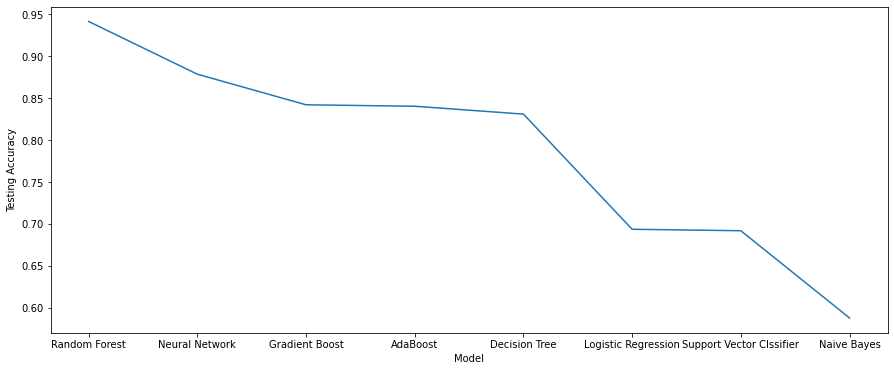

In [136]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'Model', y= 'Testing Accuracy', data= result2)

## ............................................... FEATURE ENGINEERING .....................................................

**`Fearure Selection : Univariate Analysis`**

In [13]:
# Univariate Analysis
data = df.drop(['churn'], axis=1)

from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k = 9)

data_req = select.fit_transform(data, df['churn'])
data_req

array([[  1.  ,  25.  , 265.1 , ...,  45.07,  16.78,  75.56],
       [  1.  ,  26.  , 161.6 , ...,  27.47,  16.62,  59.24],
       [  0.  ,   0.  , 243.4 , ...,  41.38,  10.3 ,  62.29],
       ...,
       [  0.  ,   0.  , 180.8 , ...,  30.74,  24.55,  67.74],
       [  0.  ,   0.  , 213.8 , ...,  36.35,  13.57,  57.53],
       [  1.  ,  25.  , 234.4 , ...,  39.85,  22.6 ,  77.01]])

In [20]:
df_new = pd.DataFrame(select.inverse_transform(data_req), index= df.index, columns= data.columns)

req_columns = df_new.columns[df_new.var() != 0]
df_final = df_new[req_columns]
df_final.head()

,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge
0,1.0,25.0,265.1,197.40,1.0,0.0,45.07,16.78,75.56
1,1.0,26.0,161.6,195.50,1.0,0.0,27.47,16.62,59.24
2,0.0,0.0,243.4,121.20,0.0,0.0,41.38,10.30,62.29
3,0.0,0.0,299.4,63.55,2.0,1.0,50.90,5.40,66.80
4,0.0,0.0,166.7,148.30,3.0,1.0,28.34,12.61,52.09


In [19]:
df_target = df['churn']
Final_df = pd.concat([df_final, df_target], axis =1)
Final_df.head()

,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge,churn
0,1.0,25.0,265.1,197.40,1.0,0.0,45.07,16.78,75.56,0
1,1.0,26.0,161.6,195.50,1.0,0.0,27.47,16.62,59.24,0
2,0.0,0.0,243.4,121.20,0.0,0.0,41.38,10.30,62.29,0
3,0.0,0.0,299.4,63.55,2.0,1.0,50.90,5.40,66.80,0
4,0.0,0.0,166.7,148.30,3.0,1.0,28.34,12.61,52.09,0


In [140]:
print(Final_df.shape)
Final_df.corr()

(3333, 10)


,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge,churn
voice_mail_plan,1.000000,0.956927,-0.001684,0.021545,-0.017824,0.006006,-0.001686,0.021559,0.008585,-0.102148
voice_mail_messages,0.956927,1.000000,0.000778,0.017562,-0.013263,0.008745,0.000776,0.017578,0.009766,-0.089728
day_mins,-0.001684,0.000778,1.000000,0.007043,-0.013423,0.049396,1.000000,0.007029,0.884754,0.205151
evening_mins,0.021545,0.017562,0.007043,1.000000,-0.012985,0.019100,0.007050,1.000000,0.413143,0.092796
customer_service_calls,-0.017824,-0.013263,-0.013423,-0.012985,1.000000,-0.024522,-0.013427,-0.012987,-0.019873,0.208750
international_plan,0.006006,0.008745,0.049396,0.019100,-0.024522,1.000000,0.049398,0.019106,0.048415,0.259852
day_charge,-0.001686,0.000776,1.000000,0.007050,-0.013427,0.049398,1.000000,0.007036,0.884757,0.205151
evening_charge,0.021559,0.017578,0.007029,1.000000,-0.012987,0.019106,0.007036,1.000000,0.413129,0.092786
total_charge,0.008585,0.009766,0.884754,0.413143,-0.019873,0.048415,0.884757,0.413129,1.000000,0.231549
churn,-0.102148,-0.089728,0.205151,0.092796,0.208750,0.259852,0.205151,0.092786,0.231549,1.000000


In [16]:
Final_df.describe()

,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.276628,8.099010,179.816157,201.009541,1.562856,0.096910,30.569292,17.086016,59.455509,0.144914
std,0.447398,13.688365,54.152190,50.401365,1.315491,0.295879,9.205865,4.284135,10.431164,0.352067
min,0.000000,0.000000,34.650000,63.550000,0.000000,0.000000,5.890000,5.400000,31.230000,0.000000
25%,0.000000,0.000000,143.700000,166.600000,1.000000,0.000000,24.430000,14.160000,52.380000,0.000000
50%,0.000000,0.000000,179.400000,201.400000,1.000000,0.000000,30.500000,17.120000,59.470000,0.000000
75%,1.000000,20.000000,216.400000,235.300000,2.000000,0.000000,36.790000,20.000000,66.480000,0.000000
max,1.000000,51.000000,325.450000,338.350000,9.000000,1.000000,55.330000,28.760000,87.630000,1.000000


In [141]:
Final_df.columns

Index(['voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins',
       'customer_service_calls', 'international_plan', 'day_charge',
       'evening_charge', 'total_charge', 'churn'],
      dtype='object')

### Dimensionality Reduction : Principle Component Analysis [PCA]

**To Eliminate/Reduce the problem of Multi-collinearity**

In [142]:
# Importing Packages for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [143]:
#Converting to array
Data = data.values
Data

# Standardizing the data
Data_std = scale(Data)

In [144]:
#Initialize PCA Algorithm
pca = PCA(n_components=18)
pca_values = pca.fit_transform(Data_std)
pca_values 

array([[ 2.67931826e+00, -9.24410147e-01,  1.81407013e-02, ...,
         1.80979151e-04,  2.01998352e-04, -3.12448429e-16],
       [-7.24224581e-02, -4.11393440e-02, -3.31174350e-01, ...,
         3.41508391e-04, -2.29354872e-04,  1.18805533e-15],
       [ 4.32448758e-01,  4.23428664e-01, -2.81438697e+00, ...,
        -3.70051728e-04,  1.46680742e-04,  7.84707654e-16],
       ...,
       [ 1.24106776e+00,  2.07633956e+00,  2.52019929e-01, ...,
         3.65326116e-04,  2.77016502e-04, -4.49343260e-16],
       [-4.92294619e-02, -4.42625906e-01,  1.47797472e-01, ...,
         6.50915475e-04,  2.73077669e-04, -2.16273823e-16],
       [ 2.84713775e+00,  9.25686506e-01,  4.73248229e-01, ...,
        -2.20283029e-04,  1.20052196e-04,  4.35364808e-16]])

In [145]:
# Weights of component from w1 to w18
pca.components_

array([[ 1.60027632e-03,  1.55722101e-02,  1.61319255e-02,
         5.10400546e-01,  2.40531279e-01,  1.19218630e-01,
         1.43451768e-02, -1.78048045e-02,  4.12920598e-02,
         2.31165695e-03,  5.10402280e-01,  8.00787608e-03,
         2.40523628e-01,  2.22509387e-02,  1.19204341e-01,
         6.68477554e-03,  1.43720602e-02,  5.75588557e-01],
       [ 1.48841701e-02,  5.65326999e-02,  5.65298777e-02,
        -1.85523795e-02,  2.55131315e-01, -5.16610083e-01,
         4.00623886e-01, -7.88386063e-03,  7.37379857e-02,
        -1.65493876e-02, -1.85518432e-02,  3.12137150e-03,
         2.55133702e-01, -1.62315589e-02, -5.16614978e-01,
         4.10207484e-02,  4.00600703e-01,  5.16354119e-03],
       [-1.94882164e-02,  2.67378803e-01,  2.63050278e-01,
        -1.96267567e-01,  4.71932779e-01, -4.73631260e-02,
        -4.04194902e-01, -4.16728090e-03, -3.28199113e-02,
        -4.83023131e-02, -1.96264017e-01, -2.77555301e-02,
         4.71942595e-01,  1.39651014e-02, -4.73649413e

In [146]:
#Understanding variance (information carried) of each principle component
var = pca.explained_variance_ratio_
var

array([1.67315271e-01, 1.13277319e-01, 1.12409332e-01, 1.10020633e-01,
       1.06873061e-01, 5.94084213e-02, 5.71298993e-02, 5.59815676e-02,
       5.47076907e-02, 5.44135688e-02, 5.35657535e-02, 5.25111414e-02,
       2.38587887e-03, 4.02897311e-07, 4.42035720e-08, 1.31408670e-08,
       3.28141565e-09, 1.24640152e-32])

In [147]:
#calculating Cumulative Variance
var_net = np.cumsum(np.round(var,decimals = 4)*100)
var_net

array([ 16.73,  28.06,  39.3 ,  50.3 ,  60.99,  66.93,  72.64,  78.24,
        83.71,  89.15,  94.51,  99.76, 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  ])

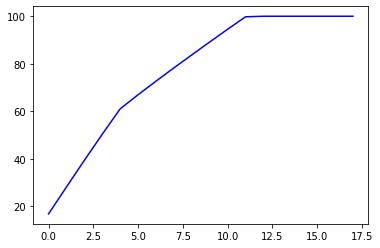

In [148]:
#Plotting the variance of each component
plt.plot(var_net, color="blue")

In [149]:
# Selecting 1st 11 components to include 95% of information
final_data = pd.concat([pd.DataFrame(pca_values[:, 0:11], 
                                     columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']), 
                                     df['churn']], axis=1)              
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,churn
0,2.679318,-0.924410,0.018141,-1.300418,1.737622,0.353871,0.880092,0.417708,-0.360065,-0.300316,-0.121718,0
1,-0.072422,-0.041139,-0.331174,-3.090216,0.524818,0.327906,0.473703,0.435448,-0.761580,-0.868326,0.152108,0
2,0.432449,0.423429,-2.814387,1.097575,1.134907,1.131257,-0.115023,0.291923,-0.099444,-0.963581,0.210204,0
3,1.355708,-2.220361,-2.758408,2.642841,2.698652,0.216331,-1.423938,0.309410,0.979656,2.912049,-1.349851,0
4,-1.098938,-0.187651,-1.254303,0.845499,0.211423,0.571979,-1.349876,-0.553862,-1.959399,1.296207,-0.944104,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.131360,-1.257756,1.320891,-2.754549,0.795098,1.277238,0.683246,-1.910525,0.318078,0.869919,-0.359953,0
3329,0.630933,-0.612499,-1.169735,1.319114,0.595689,-2.793064,-0.977648,0.488966,0.468313,1.568714,1.284485,0
3330,1.241068,2.076340,0.252020,-0.721258,-2.188031,-1.505293,0.450546,1.490677,1.402840,0.041819,0.716237,0
3331,-0.049229,-0.442626,0.147797,3.134613,1.470016,2.822381,-2.105767,0.063272,-0.119525,2.811582,1.691901,0


In [150]:
final_data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

## Model Building : Imbalanced & Processed Data post Feature Engineering

# .................................................................................................................

In [152]:
#Normalizing the dataframe input feartures
from sklearn.preprocessing import MinMaxScaler
norm_in = final_data.iloc[:, :11]
norm_in = MinMaxScaler().fit_transform(norm_in)
norm_in = pd.DataFrame(norm_in, columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
final_data = pd.concat([norm_in, final_data['churn']], axis= 1)
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,churn
0,0.718496,0.398989,0.463275,0.325072,0.601035,0.487025,0.616046,0.515840,0.323789,0.349802,0.477960,0
1,0.492011,0.486703,0.429156,0.159199,0.469129,0.483867,0.559332,0.518074,0.273641,0.273791,0.516989,0
2,0.533565,0.532837,0.186608,0.547311,0.535483,0.581573,0.477171,0.500000,0.356341,0.261044,0.525270,0
3,0.609555,0.270294,0.192076,0.690521,0.705557,0.470297,0.294501,0.502203,0.491118,0.779679,0.302911,0
4,0.407523,0.472153,0.338989,0.523949,0.435044,0.513552,0.304837,0.393493,0.124035,0.563448,0.360743,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.508784,0.365886,0.590522,0.190307,0.498525,0.599328,0.588575,0.222653,0.408488,0.506402,0.444004,0
3329,0.549901,0.429963,0.347250,0.567842,0.476837,0.104285,0.356785,0.524813,0.427252,0.599915,0.678391,0
3330,0.600119,0.696980,0.486120,0.378747,0.174078,0.260908,0.556100,0.650956,0.543973,0.395586,0.597397,0
3331,0.493920,0.446833,0.475940,0.736097,0.571930,0.787253,0.199347,0.471207,0.353833,0.766235,0.736461,0


In [153]:
# Deining Feature & Target Variable
x1 = final_data.iloc[:, :11]
y1 = final_data['churn']

# Splitting into traning & testing data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state= 42)

**`Model [1] : Logistic Regression`**

In [157]:
lr = LogisticRegression()
lr.fit(x1_train, y1_train)
#Train
y1_pred_lr_t = lr.predict(x1_train)
acc1_LR_t = accuracy_score(y1_pred_lr_t, y1_train)
print("Training Accuracy :", acc1_LR_t * 100)
#Test
y1_pred_lr = lr.predict(x1_test)
acc1_LR = accuracy_score(y1_pred_lr, y1_test)
print("Testing Accuarcy :", acc1_LR * 100)
print('\n')
print(classification_report(y1_pred_lr, y1_test))
print('\n')
print(confusion_matrix(y1_test, y1_pred_lr))

Training Accuracy : 86.28375482211744
Testing Accuarcy : 86.4


              precision    recall  f1-score   support

           0       0.99      0.87      0.93       977
           1       0.10      0.65      0.18        23

    accuracy                           0.86      1000
   macro avg       0.55      0.76      0.55      1000
weighted avg       0.97      0.86      0.91      1000



[[849   8]
 [128  15]]


**`Model [2] : Naive Bayes`**

In [158]:
nb = MultinomialNB()
nb.fit(x1_train, y1_train)
#Train
y1_pred_nb_t = nb.predict(x1_train)
acc1_NB_t = accuracy_score(y1_pred_nb_t, y1_train)
print("Training Accuracy :", acc1_NB_t * 100)
#Test
y1_pred_nb = nb.predict(x1_test)
acc1_NB = accuracy_score(y1_pred_nb, y1_test)
print("Testing Accuarcy :", acc1_NB * 100)
print('\n')
print(classification_report(y1_pred_nb, y1_test))
print('\n')
print(confusion_matrix(y1_test, y1_pred_nb))

Training Accuracy : 85.42648949849978
Testing Accuarcy : 85.7


              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.86      1000
   macro avg       0.50      0.43      0.46      1000
weighted avg       1.00      0.86      0.92      1000



[[857   0]
 [143   0]]


**`Model [3] : Decision Tree`**

In [159]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(x1_train,y1_train) 
#Train
y1_pred_dt_t = dt.predict(x1_train)
acc1_DT_t = accuracy_score(y1_pred_dt_t, y1_train)
print("Training Accuracy :", acc1_DT_t * 100)
#Test
y1_pred_dt = dt.predict(x1_test)
acc1_DT = accuracy_score(y1_pred_dt, y1_test)
print("Testing Accuarcy :", acc1_DT * 100)
print("\n")
print(classification_report(y1_test, y1_pred_dt))
print("\n")
print(confusion_matrix(y1_test, y1_pred_dt))

Training Accuracy : 91.89884269181312
Testing Accuarcy : 91.10000000000001


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       857
           1       0.76      0.55      0.64       143

    accuracy                           0.91      1000
   macro avg       0.84      0.76      0.79      1000
weighted avg       0.90      0.91      0.90      1000



[[832  25]
 [ 64  79]]


**`Model [4] : Random Forest`**

In [160]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x1_train, y1_train)
#Train
y1_pred_rf_t = rf.predict(x1_train)
acc1_RF_t = accuracy_score(y1_pred_rf_t, y1_train)
print("Training Accuracy :", acc1_RF_t * 100)
#Test
y1_pred_rf = rf.predict(x1_test)
acc1_RF = accuracy_score(y1_pred_rf, y1_test)
print("Testing Accuarcy :", acc1_RF * 100)
print("\n")
print(classification_report(y1_test, y1_pred_rf))
print("\n")
print(confusion_matrix(y1_test, y1_pred_rf))

Training Accuracy : 100.0
Testing Accuarcy : 93.60000000000001


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       857
           1       0.92      0.60      0.73       143

    accuracy                           0.94      1000
   macro avg       0.93      0.80      0.85      1000
weighted avg       0.94      0.94      0.93      1000



[[850   7]
 [ 57  86]]


**`Model [5] : Support Vector Classifier`**

In [161]:
sv = SVC()
sv.fit(x1_train, y1_train)
#Train
y1_pred_sv_t = sv.predict(x1_train)
acc1_SVC_t = accuracy_score(y1_pred_sv_t, y1_train)
print("Training Accuracy :", acc1_SVC_t * 100)
#Test
y1_pred_sv = sv.predict(x1_test)
acc1_SVC = accuracy_score(y1_pred_sv, y1_test)
print("Testing Accuarcy :", acc1_SVC * 100)
print("\n")
print(classification_report(y1_test, y1_pred_sv))
print("\n")
print(confusion_matrix(y1_test, y1_pred_sv))

Training Accuracy : 94.04200600085727
Testing Accuarcy : 91.2


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       857
           1       0.87      0.45      0.60       143

    accuracy                           0.91      1000
   macro avg       0.89      0.72      0.77      1000
weighted avg       0.91      0.91      0.90      1000



[[847  10]
 [ 78  65]]


**`Model [6] : Gradient Boosting`**

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(x1_train,y1_train) 
#Train
y1_pred_gb_t = gb.predict(x1_train)
acc1_GB_t = accuracy_score(y1_pred_gb_t, y1_train)
print("Training Accuracy :", acc1_GB_t * 100)
#Test
y1_pred_gb = gb.predict(x1_test)
acc1_GB = accuracy_score(y1_pred_gb, y1_test)
print("Testing Accuarcy :", acc1_GB * 100)
print("\n")
print(classification_report(y1_test, y1_pred_gb))
print("\n")
print(confusion_matrix(y1_test, y1_pred_gb))

Training Accuracy : 91.6845263609087
Testing Accuarcy : 90.4


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       857
           1       0.72      0.54      0.62       143

    accuracy                           0.90      1000
   macro avg       0.82      0.75      0.78      1000
weighted avg       0.90      0.90      0.90      1000



[[827  30]
 [ 66  77]]


**`Model [7] : AdaBoost Classifier`**

In [165]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ab.fit(x1_train,y1_train) 
#Train
y1_pred_ab_t = ab.predict(x1_train)
acc1_AB_t = accuracy_score(y1_pred_ab_t, y1_train)
print("Training Accuracy :", acc1_AB_t * 100)
#Test
y1_pred_ab = ab.predict(x1_test)
acc1_AB = accuracy_score(y1_pred_ab, y1_test)
print("Testing Accuarcy :", acc1_AB * 100)
print("\n")
print(classification_report(y1_test, y1_pred_ab))
print("\n")
print(confusion_matrix(y1_test, y1_pred_ab))

Training Accuracy : 92.58465495070725
Testing Accuarcy : 90.4


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       857
           1       0.72      0.55      0.62       143

    accuracy                           0.90      1000
   macro avg       0.82      0.75      0.78      1000
weighted avg       0.90      0.90      0.90      1000



[[826  31]
 [ 65  78]]


**`Model [8] : Neural Network`**

In [154]:
# Hypertuning of Batchsize & Epochs

# create model
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11 ,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [155]:
# Building the model

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(x1, y1) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.877 total time=   6.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.888 total time=   6.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.853 total time=   6.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.851 total time=   6.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.841 total time=   6.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [166]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9138889908790588, using {'batch_size': 20, 'epochs': 100}
0.8619766712188721,0.01743990659023912 with: {'batch_size': 10, 'epochs': 10}
0.8949876427650452,0.014766360586843032 with: {'batch_size': 10, 'epochs': 50}
0.900992751121521,0.028810700657464 with: {'batch_size': 10, 'epochs': 100}
0.8574780106544495,0.01992737301616067 with: {'batch_size': 20, 'epochs': 10}
0.8922831416130066,0.011378291552830783 with: {'batch_size': 20, 'epochs': 50}
0.9138889908790588,0.0076491912396709355 with: {'batch_size': 20, 'epochs': 100}
0.8550773978233337,0.017877037683791175 with: {'batch_size': 40, 'epochs': 10}
0.8817843437194824,0.011798238947002824 with: {'batch_size': 40, 'epochs': 50}
0.9048957347869873,0.014920507384429902 with: {'batch_size': 40, 'epochs': 100}


In [167]:
# Hypertuning of Activation Function & Kernal Initializer

from keras.layers import Dropout

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 50,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x1, y1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.861 total time=   2.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.888 total time=   2.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.845 total time=   2.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.838 total time=   3.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.844 total time=   2.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.845 total time=   2.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.838 total time=   2.9s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.861 total time=   2.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.888 total time=   2.3s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.844 total time=   2.3s
[CV 4/5; 11/12] START activation_f

In [168]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.8550773978233337, using {'activation_function': 'softmax', 'init': 'uniform'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'relu', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'relu', 'init': 'zero'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'tanh', 'init': 'normal'}
0.8550773978233337,0.017877037683791175 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8550773978233337,0.017877037683791175 wit

In [169]:
# Hypertuning of number of neurons in Activation Layer

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x1,y1) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.861 total time=   2.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.888 total time=   2.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.844 total time=   2.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.845 total time=   3.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.838 total time=   2.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [170]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8550773978233337, using {'neuron1': 4, 'neuron2': 2}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 4, 'neuron2': 2}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 4, 'neuron2': 4}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 4, 'neuron2': 8}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 8, 'neuron2': 2}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 8, 'neuron2': 4}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 8, 'neuron2': 8}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 16, 'neuron2': 2}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 16, 'neuron2': 4}
0.8550773978233337,0.017877037683791175 with: {'neuron1': 16, 'neuron2': 8}


In [171]:
# Training the model with optimum values

from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(2,input_dim = 11,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    # adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10, epochs = 100)

# Fitting the model

model.fit(x1,y1)

# Predicting using trained model

y1_predict = model.predict(x1)

# Printing the metrics
acc1_ANN = accuracy_score(y1,y1_predict)
print(acc1_ANN * 100)

85.5085508550855


### Compairing the accuracies : Imbalanced Processed Data post Feature Engineering

In [172]:
# Compairing Accuracies - Imbalanced Processed Data
Imbalanced_Processed =  {'Model' : ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
                                   'Support Vector Clssifier', 'Gradient Boost', 'AdaBoost', 'Neural Network'],
                      'Training Accuracy' : [acc1_LR_t, acc1_NB_t, acc1_DT_t, acc1_RF_t, acc1_SVC_t, acc1_GB_t, acc1_AB_t, "NA"],
                         'Testing Accuracy' : [acc1_LR, acc1_NB, acc1_DT, acc1_RF, acc1_SVC, acc1_GB, acc1_AB, acc1_ANN]}

result3 = pd.DataFrame(Imbalanced_Processed)
result3 = result3.sort_values(by = 'Testing Accuracy', ascending= False, ignore_index= True)
result3

,Model,Training Accuracy,Testing Accuracy
0,Random Forest,1.0,0.936000
1,Support Vector Clssifier,0.94042,0.912000
2,Decision Tree,0.918988,0.911000
3,Gradient Boost,0.916845,0.904000
4,AdaBoost,0.925847,0.904000
5,Logistic Regression,0.862838,0.864000
6,Naive Bayes,0.854265,0.857000
7,Neural Network,NA,0.855086


<AxesSubplot:xlabel='Model', ylabel='Testing Accuracy'>

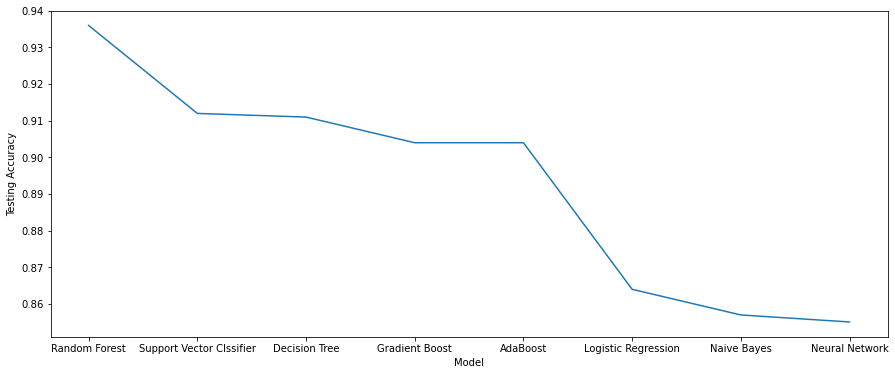

In [174]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'Model', y= 'Testing Accuracy', data= result3)

## ................................................ BALANCING THE DATA ............................................................

0    2850
1     483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

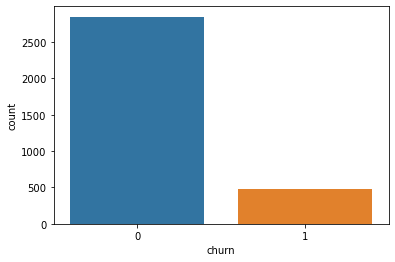

In [175]:
print(final_data['churn'].value_counts())

sns.countplot(x = 'churn', data= final_data)

In [176]:
# Oversampling Minor Class
from imblearn.over_sampling import SMOTE

In [177]:
x1 = final_data.iloc[:, :11]
y1 = final_data['churn']

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTE(sampling_strategy = 'minority', random_state= 0)
x1_res,y1_res = smk.fit_resample(x1, y1)
final_bal = pd.concat([pd.DataFrame(x1_res), pd.DataFrame(y1_res)], axis=1)
final_bal.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,churn
0,0.718496,0.398989,0.463275,0.325072,0.601035,0.487025,0.616046,0.515840,0.323789,0.349802,0.477960,0
1,0.492011,0.486703,0.429156,0.159199,0.469129,0.483867,0.559332,0.518074,0.273641,0.273791,0.516989,0
2,0.533565,0.532837,0.186608,0.547311,0.535483,0.581573,0.477171,0.500000,0.356341,0.261044,0.525270,0
3,0.609555,0.270294,0.192076,0.690521,0.705557,0.470297,0.294501,0.502203,0.491118,0.779679,0.302911,0
4,0.407523,0.472153,0.338989,0.523949,0.435044,0.513552,0.304837,0.393493,0.124035,0.563448,0.360743,0


0    2850
1    2850
Name: churn, dtype: int64




<AxesSubplot:xlabel='churn', ylabel='count'>

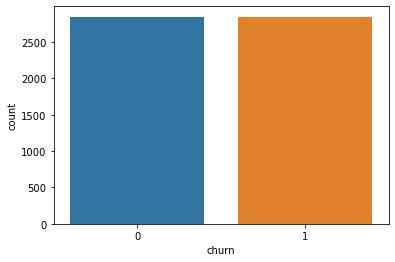

In [178]:
print(final_bal['churn'].value_counts())

print('\n')
sns.countplot(x = 'churn', data = final_bal)

## Model Building : Balanced Processed Data post Feature Engineering

# .................................................................................................................

In [179]:
#Feature & Target Variables
X1 = final_bal.iloc[:, :11]
Y1 = final_bal['churn']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size= 0.3, random_state=10)

**`Model [1] : Logistic Regression`**

In [189]:
lr = LogisticRegression()
lr.fit(X1_train, Y1_train)
#Train
Y1_pred_lr_t = lr.predict(X1_train)
acc1_LR_t1 = accuracy_score(Y1_pred_lr_t, Y1_train)
print("Training Accuracy :", acc1_LR_t1 * 100)
#Test
Y1_pred_lr = lr.predict(X1_test)
acc1_bal_LR = accuracy_score(Y1_pred_lr, Y1_test)
print("Testing Accuarcy :", acc1_bal_LR * 100)
print('\n')
print(classification_report(Y1_pred_lr, Y1_test))
print('\n')
print(confusion_matrix(Y1_test, Y1_pred_lr))

Training Accuracy : 73.93483709273183
Testing Accuarcy : 74.09356725146199


              precision    recall  f1-score   support

           0       0.74      0.74      0.74       851
           1       0.74      0.74      0.74       859

    accuracy                           0.74      1710
   macro avg       0.74      0.74      0.74      1710
weighted avg       0.74      0.74      0.74      1710



[[632 224]
 [219 635]]


**`Model [2] : Naive Bayes`**

In [190]:
nb = MultinomialNB()
nb.fit(X1_train, Y1_train)
#Train
Y1_pred_nb_t = nb.predict(X1_train)
acc1_NB_t1 = accuracy_score(Y1_pred_nb_t, Y1_train)
print("Training Accuracy :", acc1_NB_t1 * 100)
#Test
Y1_pred_nb = nb.predict(X1_test)
acc1_bal_NB = accuracy_score(Y1_pred_nb, Y1_test)
print("Testing Accuarcy :", acc1_bal_NB * 100)
print('\n')
print(classification_report(Y1_pred_nb, Y1_test))
print('\n')
print(confusion_matrix(Y1_test, Y1_pred_nb))

Training Accuracy : 72.531328320802
Testing Accuarcy : 73.21637426900584


              precision    recall  f1-score   support

           0       0.74      0.73      0.73       872
           1       0.72      0.74      0.73       838

    accuracy                           0.73      1710
   macro avg       0.73      0.73      0.73      1710
weighted avg       0.73      0.73      0.73      1710



[[635 221]
 [237 617]]


**`Model [3] : Decision Tree`**

In [191]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X1_train,Y1_train) 
#Train
Y1_pred_dt_t = dt.predict(X1_train)
acc1_DT_t1 = accuracy_score(Y1_pred_dt_t, Y1_train)
print("Training Accuracy :", acc1_DT_t1 * 100)
#Test
Y1_pred_dt = dt.predict(X1_test)
acc1_bal_DT = accuracy_score(Y1_pred_dt, Y1_test)
print("Testing Accuarcy :", acc1_bal_DT * 100)
print("\n")
print(classification_report(Y1_test, Y1_pred_dt))
print("\n")
print(confusion_matrix(Y1_test, Y1_pred_dt))

Training Accuracy : 79.62406015037594
Testing Accuarcy : 80.11695906432749


              precision    recall  f1-score   support

           0       0.77      0.87      0.81       856
           1       0.85      0.73      0.79       854

    accuracy                           0.80      1710
   macro avg       0.81      0.80      0.80      1710
weighted avg       0.81      0.80      0.80      1710



[[743 113]
 [227 627]]


**`Model [4] : Random Forest`**

In [192]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X1_train, Y1_train)
#Train
Y1_pred_rf_t = rf.predict(X1_train)
acc1_RF_t1 = accuracy_score(Y1_pred_rf_t, Y1_train)
print("Training Accuracy :", acc1_RF_t1 * 100)
#Test
Y1_pred_rf = rf.predict(X1_test)
acc1_bal_RF = accuracy_score(Y1_pred_rf, Y1_test)
print("Testing Accuarcy :", acc1_bal_RF * 100)
print("\n")
print(classification_report(Y1_test, Y1_pred_rf))
print("\n")
print(confusion_matrix(Y1_test, Y1_pred_rf))

Training Accuracy : 100.0
Testing Accuarcy : 95.08771929824562


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       856
           1       0.96      0.94      0.95       854

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710



[[827  29]
 [ 55 799]]


**`Model [5] : Support Vector Classifier`**

In [193]:
sv = SVC()
sv.fit(X1_train, Y1_train)
#Train
Y1_pred_sv_t = sv.predict(X1_train)
acc1_SVC_t1 = accuracy_score(Y1_pred_sv_t, Y1_train)
print("Training Accuracy :", acc1_SVC_t1 * 100)
#Test
Y1_pred_sv = sv.predict(X1_test)
acc1_bal_SVC = accuracy_score(Y1_pred_sv, Y1_test)
print("Testing Accuarcy :", acc1_bal_SVC * 100)
print("\n")
print(classification_report(Y1_test, Y1_pred_sv))
print("\n")
print(confusion_matrix(Y1_test, Y1_pred_sv))

Training Accuracy : 91.50375939849624
Testing Accuarcy : 90.29239766081871


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       856
           1       0.92      0.89      0.90       854

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710



[[787  69]
 [ 97 757]]


**`Model [6] : Gradient Boosting`**

In [194]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X1_train,Y1_train) 
#Train
Y1_pred_gb_t = gb.predict(X1_train)
acc1_GB_t1 = accuracy_score(Y1_pred_gb_t, Y1_train)
print("Training Accuracy :", acc1_GB_t1 * 100)
#Test
Y1_pred_gb = gb.predict(X1_test)
acc1_bal_GB = accuracy_score(Y1_pred_gb, Y1_test)
print("Testing Accuarcy :", acc1_bal_GB * 100)
print("\n")
print(classification_report(Y1_test, Y1_pred_gb))
print("\n")
print(confusion_matrix(Y1_test, Y1_pred_gb))

Training Accuracy : 86.14035087719299
Testing Accuarcy : 82.16374269005848


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       856
           1       0.82      0.82      0.82       854

    accuracy                           0.82      1710
   macro avg       0.82      0.82      0.82      1710
weighted avg       0.82      0.82      0.82      1710



[[706 150]
 [155 699]]


**`Model [7] : AdaBoost Classifier`**

In [195]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ab.fit(X1_train,Y1_train) 
#Train
Y1_pred_ab_t = ab.predict(X1_train)
acc1_AB_t1 = accuracy_score(Y1_pred_ab_t, Y1_train)
print("Training Accuracy :", acc1_AB_t1 * 100)
#Test
Y1_pred_ab = ab.predict(X1_test)
acc1_bal_AB = accuracy_score(Y1_pred_ab, Y1_test)
print("Testing Accuarcy :", acc1_bal_AB * 100)
print("\n")
print(classification_report(Y1_test, Y1_pred_ab))
print("\n")
print(confusion_matrix(Y1_test, Y1_pred_ab))

Training Accuracy : 84.3358395989975
Testing Accuarcy : 82.046783625731


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       856
           1       0.83      0.81      0.82       854

    accuracy                           0.82      1710
   macro avg       0.82      0.82      0.82      1710
weighted avg       0.82      0.82      0.82      1710



[[715 141]
 [166 688]]


**`Model [8] : Neural Network'**

In [180]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler 
Std = StandardScaler()
X1_std = Std.fit_transform(X1)
X1_std

array([[ 1.14569981, -0.72256828,  0.12223858, ..., -0.21254433,
        -0.48238841, -0.07326111],
       [-0.23457963, -0.07428366, -0.14074062, ..., -0.62468629,
        -0.99854008,  0.19756595],
       [ 0.01866492,  0.26669024, -2.01020851, ...,  0.0549746 ,
        -1.08509818,  0.25502537],
       ...,
       [-1.28480161, -0.46435522, -0.32916423, ..., -0.74100046,
         1.96538917, -2.08058654],
       [-0.56342235,  0.17042529, -0.62259689, ..., -0.15770119,
         0.53864099,  0.10196341],
       [-0.57211244, -0.36178224, -0.66706505, ..., -0.62791956,
         0.42302281,  1.33084938]])

In [181]:
# Hypertuning of Batchsize & Epochs

# create model
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11 ,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [182]:
# Building the model

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X1_std, Y1) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.851 total time=   9.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.855 total time=   9.1s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.860 total time=   9.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.820 total time=   8.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.829 total time=   9.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [183]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8859649062156677, using {'batch_size': 20, 'epochs': 100}
0.8429824471473694,0.015543907902632263 with: {'batch_size': 10, 'epochs': 10}
0.8714035153388977,0.01915897721092767 with: {'batch_size': 10, 'epochs': 50}
0.869473671913147,0.023890592030457715 with: {'batch_size': 10, 'epochs': 100}
0.8424561381340027,0.010723305830586125 with: {'batch_size': 20, 'epochs': 10}
0.8761403441429139,0.020424849499131932 with: {'batch_size': 20, 'epochs': 50}
0.8859649062156677,0.026415029974971162 with: {'batch_size': 20, 'epochs': 100}
0.8150877237319947,0.014028500943786515 with: {'batch_size': 40, 'epochs': 10}
0.8670175433158874,0.01857163311303487 with: {'batch_size': 40, 'epochs': 50}
0.8691228151321411,0.014503152733070531 with: {'batch_size': 40, 'epochs': 100}


In [184]:
# Hypertuning of Activation Function & Kernal Initializer

from keras.layers import Dropout

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 50,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X1_std, Y1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.514 total time=   3.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.582 total time=   3.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.646 total time=   3.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   3.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.161 total time=   3.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.689 total time=   3.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.589 total time=   3.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.573 total time=   3.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.650 total time=   3.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.675 total time=   3.7s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.685 total time=   3.1s
[CV 4/5; 11/12] START activation_f

In [185]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7519298315048217, using {'activation_function': 'relu', 'init': 'uniform'}
0.3803508847951889,0.25366055389494474 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.3705263137817383,0.3031935273769306 with: {'activation_function': 'softmax', 'init': 'normal'}
0.33631578683853147,0.2785269886903437 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7519298315048217,0.048954605100581944 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7022807002067566,0.07638048246031971 with: {'activation_function': 'relu', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'relu', 'init': 'zero'}
0.6361403465270996,0.040580585954983914 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.6347368478775024,0.04259438840535916 with: {'activation_function': 'tanh', 'init': 'normal'}
0.1,0.08871886666172708 with: {'activation_function': 'tanh', 'init': 'zero'}
0.6307017564773559,0.043496755680457196 with: {'activation_function': 'linear', 'ini

In [186]:
# Hypertuning of number of neurons in Activation Layer

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X1_std,Y1) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.660 total time=   3.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.725 total time=   3.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.748 total time=   3.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.630 total time=   3.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [187]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7971929788589478, using {'neuron1': 16, 'neuron2': 8}
0.5526315808296204,0.2796212749558975 with: {'neuron1': 4, 'neuron2': 2}
0.7077192902565003,0.07045864376427576 with: {'neuron1': 4, 'neuron2': 4}
0.7059649229049683,0.03411547485558368 with: {'neuron1': 4, 'neuron2': 8}
0.7349122762680054,0.06081774240321925 with: {'neuron1': 8, 'neuron2': 2}
0.778947365283966,0.023458973476588815 with: {'neuron1': 8, 'neuron2': 4}
0.7859649181365966,0.025502045613763877 with: {'neuron1': 8, 'neuron2': 8}
0.7950877189636231,0.026155069250973113 with: {'neuron1': 16, 'neuron2': 2}
0.791929829120636,0.04769026865211635 with: {'neuron1': 16, 'neuron2': 4}
0.7971929788589478,0.03583588779765808 with: {'neuron1': 16, 'neuron2': 8}


In [188]:
# Training the model with optimum values

from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    # adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40, epochs = 50)

# Fitting the model

model.fit(X1_std,Y1)

# Predicting using trained model

Y1_predict = model.predict(X1_std)

# Printing the metrics
acc1_bal_ANN = accuracy_score(Y1,Y1_predict)
print(acc_bal_ANN * 100)

87.85964912280701


In [196]:
# Compairing Accuracies - Balanced Origial Data
Balanced_Processed =  {'Model' : ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
                                   'Support Vector Clssifier', 'Gradient Boost', 'AdaBoost', 'Neural Network'],
                       'Training Accuracy' : [acc1_LR_t1, acc1_NB_t1, acc1_DT_t1, acc1_RF_t1, acc1_SVC_t1, acc1_GB_t1, acc1_AB_t1, "NA"],
                       'Testing Accuracy' : [acc1_bal_LR, acc1_bal_NB, acc1_bal_DT, acc1_bal_RF, acc1_bal_SVC, 
                                     acc1_bal_GB, acc1_bal_AB, acc1_bal_ANN]}

result4 = pd.DataFrame(Balanced_Processed)
result4 = result4.sort_values(by = 'Testing Accuracy', ascending= False, ignore_index= True)
result4

,Model,Training Accuracy,Testing Accuracy
0,Random Forest,1.0,0.950877
1,Support Vector Clssifier,0.915038,0.902924
2,Neural Network,NA,0.890877
3,Gradient Boost,0.861404,0.821637
4,AdaBoost,0.843358,0.820468
5,Decision Tree,0.796241,0.801170
6,Logistic Regression,0.739348,0.740936
7,Naive Bayes,0.725313,0.732164


<AxesSubplot:xlabel='Model', ylabel='Testing Accuracy'>

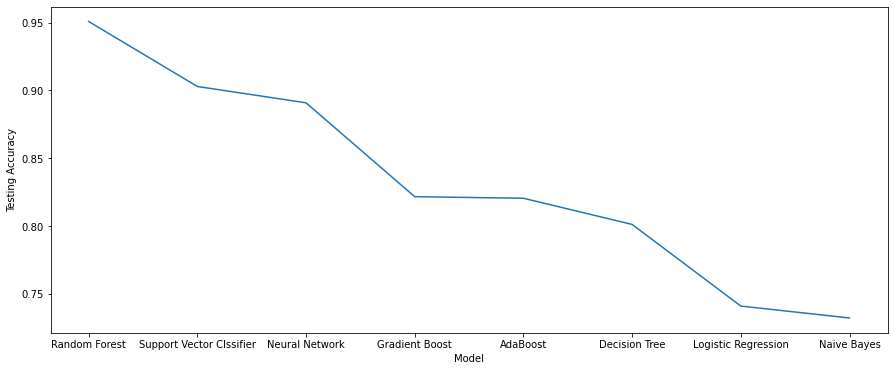

In [197]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'Model', y= 'Testing Accuracy', data= result4)